![[CITYPNG.COM]FedEx Delivery Company Logo HD PNG - 5000x5000.png](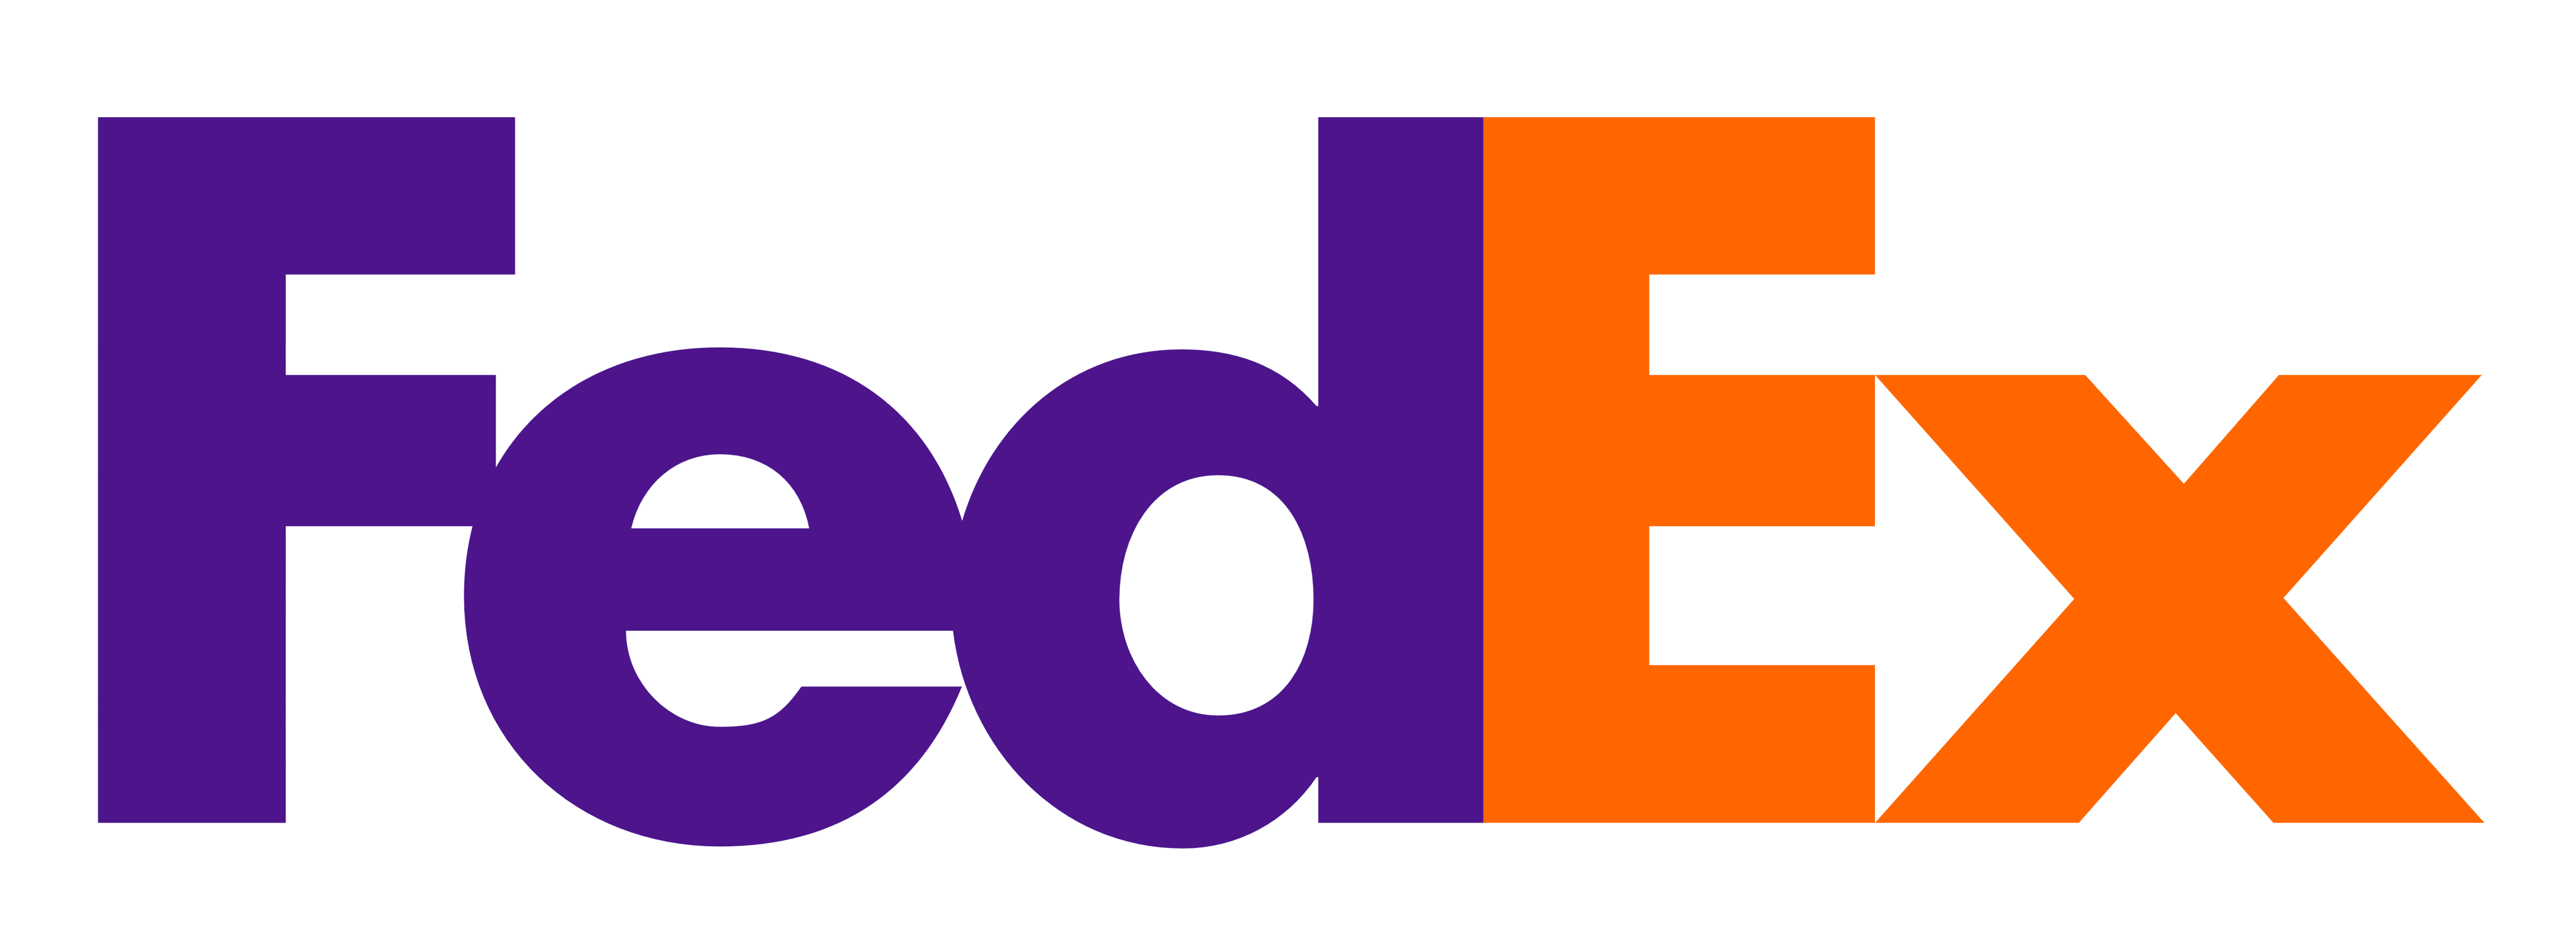)

# **Fed-Ex Exploratory Data Analysis Project**

# Author Details

**Done By - Shantanu Das**

## Contact Information

* [E-Mail](mailto:shantheartist420@gmail.com)
* [GitHub](https://github.com/trucoshan)
* [Linkedin](https://www.linkedin.com/in/datashan/)
* [My Website](https://datashan.xyz)

# **Acknowledgement**

I would like to express my gratitude to **AlmaBetter** for providing the dataset and structured guidance that made this project possible. This work forms part of my ongoing learning journey in the **Full Stack Data Science program** at AlmaBetter, where practical, hands-on projects form the foundation of skill development.  

I also extend my thanks to **Amity Online** and **Woolf University**, whose academic resources and curriculum support have contributed to my broader understanding of computer science and data-driven problem solving.  

Finally, I acknowledge the instructors, peers, and the larger learning community across these institutions for their continuous support, collaboration, and feedback. This project reflects not only my individual effort but also the ecosystem of learning and mentorship that I am privileged to be part of.  

# Problem Statement  

With the rapid growth of **eCommerce and international trade**, timely and cost-effective delivery has become a critical differentiator for logistics companies like FedEx. The complexity of managing diverse **shipment modes**, **delivery statuses**, **vendor relationships**, and **geographies** introduces multiple variables that can affect delivery reliability, cost efficiency, and customer satisfaction.  

The dataset captures shipment information such as **delivery delays, shipment modes, fulfillment methods, insurance costs, and weights**, along with **country-level details**. Analyzing this data provides an opportunity to uncover **patterns of inefficiency, bottlenecks, and risks** that directly impact supply chain performance.  


# Business Objective

The primary business objective is to **optimize FedEx’s logistics operations** by:  

1. **Improving delivery reliability** – Identifying key factors (teams, modes, routes, vendor timelines, INCO terms) that influence on-time vs. delayed shipments.  
2. **Reducing operational costs** – Highlighting inefficiencies related to freight costs, insurance, and shipment weights that can be streamlined without compromising quality.  
3. **Enhancing customer satisfaction** – Ensuring that delivery delays are minimized while balancing cost and flexibility.  
4. **Supporting strategic decisions** – Providing actionable insights for **resource allocation, mode selection, and vendor management** to strengthen competitive advantage in the logistics space.


# Overview

This project explores and analyzes **10,324 shipment records** from FedEx to understand factors driving delivery performance, costs, and inefficiencies. The analysis was carried out in the following structured steps:

## 1. Data Import & Setup
- Loaded the dataset `SCMS_Delivery_History_Dataset.csv` using **Pandas**.  
- Configured environment settings (`matplotlib`, `seaborn`, `plotly`, `folium`) for visualization.  
- Verified dataset size: **10,324 rows × 33 columns**.

## 2. Initial Exploration
- Performed `.head()`, `.tail()`, `.shape()`, `.nunique()`, `.describe()` to understand data spread.  
- Checked for **duplicates** (none found) and **null values** (notable in `Shipment Mode`, `Dosage`, `Line Item Insurance`).  
- Created a **data dictionary** mapping each column to its meaning.  

## 3. Data Wrangling & Cleaning
- Standardized column names for readability.  
- Converted date columns (e.g., *Scheduled Delivery Date*, *Delivered to Client Date*) into **datetime** objects.  
- Engineered new features:  
  - **Delivery_Delay** = Difference between actual and scheduled delivery.  
  - **Delivery_Status** = Categorized as *Early*, *On-Time*, *Late*.  
- Resolved messy string fields in **Weight** and **Freight Cost**:  
  - Extracted numeric values, replaced references (e.g., `ID#:xxxx`) with mapped values.  
  - Filtered out `"Not Captured"` or `"Freight Included in Commodity Cost"` entries.  
- Handled **outliers** in weight and cost by restricting analysis ranges (`Weight < 10,469 kg`, `Freight < 34,879 USD`) to avoid distortion.

## 4. Feature Engineering
- Created filtered dataframes for specialized analysis:  
  - `fx_rdc` → Orders fulfilled via Regional Distribution Centers.  
  - `fx_freight` → Orders with valid freight cost data.  
  - `fx_weights` → Orders with valid weight data.  
- Aggregated metrics by **Shipment Mode**, **INCO Terms**, **Fulfillment Method**, and **Country**.  
- Calculated delay percentages, mean freight/weight per mode, and year-wise delivery performance trends.

## 5. Data Visualization
- **Univariate Analysis**: Histograms, boxplots, violin plots to study distributions and outliers.  
- **Bivariate/Multivariate Analysis**:  
  - Scatterplots (Weight vs Freight, Cost vs Delay).  
  - Countplots and barplots (Shipment Modes, INCO terms, Fulfillment Methods).  
  - Pie charts to show order distributions and management concentration.  
  - Line charts for yearly delivery trends.  
- **Geospatial Analysis**: Choropleth world map showing **percentage of late deliveries by country**.

## 6. Interpretation & Business Takeaways
For each visualization, insights were extracted and translated into **logistics recommendations**, e.g.,  
- Direct Drop fulfillment is most reliable, RDC introduces variability.  
- Air is most reliable (9% delays), Trucks least (16%).  
- Freight cost does not guarantee on-time delivery → delays are driven by process issues, not just money.  
- Outliers (extremely high weight/cost) skew patterns and should be separately monitored.

---

This step-by-step approach ensured that the dataset was **cleaned, transformed, explored, and interpreted systematically**, providing both **statistical clarity** and **business value**.


# Importing Libraries

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import os
import warnings
import re
import plotly.express as px
import plotly.io as pio
import pycountry
import kaleido

# Setting Up Workspace

In [280]:
%matplotlib inline
pd.set_option('display.max_columns',500)
pio.renderers.default = "notebook"

# Navigating To Dataset

In [281]:
os.getcwd()

'C:\\Users\\shant\\Desktop\\Fed_Ex'

In [282]:
os.chdir(r"C:\Users\shant\Desktop\Fed_Ex")

# Loading Dataset

In [283]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

# Initial Exploration

## .head() and .tail()

In [284]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                2-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured                1-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                 2-Jun-06               2-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                 1-Sep-06               1-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand   Dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0         Test kit                          30                  19   
1  Oral suspension                         240                1000   
2         Test kit                         100                 500   
3           Tablet                          60               31920   
4          Capsule                          60               38000   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0            551.0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1           6200.0        6.20        0.03      Aurobindo Unit III, India   
2          40000.0       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3         127360.8        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4         121600.0        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171   

In [285]:
df.tail()

ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
10319   PMO - US    From RDC   N/A - From RDC         Truck   
10320   PMO - US    From RDC   N/A - From RDC         Truck   
10321   PMO - US    From RDC   N/A - From RDC         Truck   
10322   PMO - US    From RDC   N/A - From RDC         Truck   
10323   PMO - US    From RDC   N/A - From RDC         Truck   

      PQ First Sent to Client Date PO Sent to Vendor Date  \
10319                     10/16/14         N/A - From RDC   
10320                     10/24/14         N/A - From RDC   
10321                      8/12/14         N/A - From RDC   
10322                       7/1/15         N/A - From RDC   
10323                     10/16/14         N/A - From RDC   

      Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
10319               31-Jul-15                15-Jul-15              20-Jul-15   
10320               31-Jul-15                 6-Aug-15               7-Aug-15   
10321               31-Aug-15                25-Aug-15               3-Sep-15   
10322                9-Sep-15                 4-Aug-15              11-Aug-15   
10323               31-Aug-15                 4-Aug-15              11-Aug-15   

      Product Group Sub Classification         Vendor  \
10319           ARV          Pediatric  SCMS from RDC   
10320           ARV              Adult  SCMS from RDC   
10321           ARV              Adult  SCMS from RDC   
10322           ARV              Adult  SCMS from RDC   
10323           ARV          Pediatric  SCMS from RDC   

                                        Item Description  \
10319  Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...   
10320  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...   
10322  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10323  Lamivudine/Zidovudine 30/60mg, dispersible tab...   

                                      Molecule/Test Type    Brand  \
10319                   Lamivudine/Nevirapine/Zidovudine  Generic   
10320                              Lamivudine/Zidovudine  Generic   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...  Generic   
10322                              Lamivudine/Zidovudine  Generic   
10323                              Lamivudine/Zidovudine  Generic   

              Dosage                        Dosage Form  \
10319     30/50/60mg  Chewable/dispersible tablet - FDC   
10320      150/300mg                       Tablet - FDC   
10321  600/300/300mg                       Tablet - FDC   
10322      150/300mg                       Tablet - FDC   
10323        30/60mg  Chewable/dispersible tablet - FDC   

       Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
10319                          60              166571        599655.60   
10320                          60               21072        137389.44   
10321                          30              514526       5140114.74   
10322                          60               17465        113871.80   
10323                          60               36639         72911.61   

       Pack Price  Unit Price              Manufacturing Site  \
10319        3.60        0.06      Mylan,  H-12 & H-13, India   
10320        6.52        0.11    Hetero Unit III Hyderabad IN   
10321        9.99        0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322        6.52        0.11  Mylan (formerly Matrix) Nashik   
10323        1.99        0.03               Cipla, Goa, India   

      First Line Desig

## Number of Rows and Columns

In [286]:
print(f"There are:\n< | > {df.shape[0]} rows\n<-=-> {df.shape[1]} columns")

There are:
< | > 10324 rows
<-=-> 33 columns


## Duplicated and Null Values

### Duplicated

In [287]:
print(f"Ther are : {df.duplicated().sum()} TRUE duplicates")

Ther are : 0 TRUE duplicates


### Nulls

In [288]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [289]:
df.isnull().mean()*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

## Number of Unique Values Per Column

In [290]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

## Dataset Descripion

In [291]:
df.describe()

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [292]:
df.describe(include='object')

Project Code            PQ #    PO / SO #   ASN/DN #       Country  \
count         10324           10324        10324      10324         10324   
unique          142            1237         6233       7030            43   
top      116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166  South Africa   
freq            768            2681           67         54          1406   

       Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
count       10324       10324            10324          9964   
unique          4           2                8             4   
top      PMO - US    From RDC   N/A - From RDC           Air   
freq        10265        5404             5404          6113   

       PQ First Sent to Client Date PO Sent to Vendor Date  \
count                         10324                  10324   
unique                          765                    897   
top                  Pre-PQ Process         N/A - From RDC   
freq                           2476                   5404   

       Scheduled Delivery Date Delivered to Client Date  \
count                    10324                    10324   
unique                    2006                     2093   
top                  29-Aug-14                29-Aug-14   
freq                        97                       74   

       Delivery Recorded Date Product Group Sub Classification         Vendor  \
count                   10324         10324              10324          10324   
unique                   2042             5                  6             73   
top                 29-Aug-14           ARV              Adult  SCMS from RDC   
freq                       67          8550               6595           5404   

                         Item Description Molecule/Test Type    Brand Dosage  \
count                               10324              10324    10324   8588   
unique                                184                 86       48     54   
top     Efavirenz 600mg, tablets, 30 Tabs          Efavirenz  Generic  300mg   
freq                                  755               1125     7285    990   

       Dosage Form         Manufacturing Site First Line Designation  \
count        10324                      10324                  10324   
unique          17                         88                      2   
top         Tablet  Aurobindo Unit III, India                    Yes   
freq          3532                       3172                   7030   

                Weight (Kilograms)                  Freight Cost (USD)  
count                        10324                               10324  
unique                        4688                                6733  
top     Weight Captured Separately  Freight Included in Commodity Cost  
freq                          1507                                1442

## Study of Column names

In [293]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

# Data Dictionary

| Column                        | Description                                                                 | Data Type | Nulls |
|--------------------------------|-----------------------------------------------------------------------------|-----------|-------|
| ID                             | Unique identifier for each logistics record.                                | int64     | No Nulls |
| Project Code                   | Code representing the project or initiative tied to the shipment.           | object    | No Nulls |
| PQ #                           | Price Quotation reference number.                                           | object    | No Nulls |
| PO / SO #                      | Purchase Order or Sales Order associated with the shipment.                 | object    | No Nulls |
| ASN/DN #                       | Advanced Shipment Notice or Delivery Note reference.                        | object    | No Nulls |
| Country                        | Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).        | object    | No Nulls |
| Managed By                     | Specifies which team manages the project (e.g., PMO - US).                  | object    | No Nulls |
| Fulfill Via                    | Method of fulfillment, such as direct drop shipment.                        | object    | No Nulls |
| Vendor INCO Term               | Incoterms defining the shipment agreement (e.g., EXW, FCA).                 | object    | No Nulls |
| Shipment Mode                  | The mode of transportation used (e.g., air).                                | object    | Nulls Present |
| PQ First Sent to Client Date   | The date the Price Quotation was first sent to the client.                  | object    | No Nulls |
| PO Sent to Vendor Date         | Date the purchase order was sent to the vendor.                             | object    | No Nulls |
| Scheduled Delivery Date        | The planned date for delivery.                                              | object    | No Nulls |
| Delivered to Client Date       | The actual date the shipment was delivered.                                 | object    | No Nulls |
| Delivery Recorded Date         | Date when delivery was recorded.                                            | object    | No Nulls |
| Product Group                  | General classification of the product (e.g., HIV test, ARV Pediatric).      | object    | No Nulls |
| Sub Classification             | Further categorization of the product.                                      | object    | No Nulls |
| Vendor                         | The company supplying the goods (e.g., RANBAXY, Aurobindo).                 | object    | No Nulls |
| Item Description               | Detailed description of the item being shipped.                             | object    | No Nulls |
| Molecule/Test Type             | The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).        | object    | No Nulls |
| Brand                          | The brand name of the product (e.g., Reveal, Generic).                      | object    | No Nulls |
| Dosage                         | The dosage strength of the pharmaceutical product (if applicable).          | object    | Nulls Present |
| Dosage Form                    | The form in which the product is delivered (e.g., test kit, oral suspension).| object   | No Nulls |
| Unit of Measure (Per Pack)     | The number of units per pack.                                               | int64     | No Nulls |
| Line Item Quantity             | The total number of units shipped.                                          | int64     | No Nulls |
| Line Item Value                | The total value of the line item in the shipment.                           | float64   | No Nulls |
| Pack Price                     | Price per pack of the item.                                                 | float64   | No Nulls |
| Unit Price                     | Price per individual unit of the item.                                      | float64   | No Nulls |
| Manufacturing Site             | The location where the item was manufactured (e.g., Ranbaxy, Aurobindo).    | object    | No Nulls |
| First Line Designation         | Indicates whether the product is designated for first-line use.             | object    | No Nulls |
| Weight (Kilograms)             | The weight of the shipment.                                                 | object    | No Nulls |
| Freight Cost (USD)             | The cost of shipping the item in U.S. dollars.                              | object    | No Nulls |
| Line Item Insurance (USD)      | Insurance cost for the line item, if applicable.                            | float64   | Nulls Present |

# Initial Transformations

## Selecting Necessary Columns

In [294]:
fx = df[['ID','Project Code','PO / SO #','Country','Managed By', 'Fulfill Via',
         'Vendor INCO Term', 'Shipment Mode','PO Sent to Vendor Date','Scheduled Delivery Date', 'Delivered to Client Date',
         'Vendor','Line Item Value','Manufacturing Site',
         'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
         'Line Item Insurance (USD)']].copy()

## Changing Column Types to Datetime Format

In [295]:
fx['Scheduled Delivery Date'] = pd.to_datetime(fx['Scheduled Delivery Date'],
                                               format="%-d-%b-%y")
fx['Delivered to Client Date'] = pd.to_datetime(fx['Delivered to Client Date'],
                                                format="%-d-%b-%y")

## Standardizing Column Names

In [296]:
fx.columns = ['ID', 'Project_Code', 'PO_SO_No', 'Country', 'Managed_By',
              'Fulfill_Via', 'Vendor_INCO', 'Shipment_Mode',
              'PO_Sent_To_Vendor', 'Scheduled_Delivery','Delivered_Date',
              'Vendor', 'Line_Value', 'Manufacturing_Site',
              'First_Line', 'Weight', 'Freight_Cost', 'Line_Insurance']

# Creating New Features and Dataframes

In [297]:
fx['Delivery_Delay'] = (fx['Delivered_Date']-fx['Scheduled_Delivery']).dt.days

fx['Delivery_Status'] = fx['Delivery_Delay'].apply(lambda x: 'Early' if x<0 else('On-Time' if x==0 else 'Late'))



id_map = fx.set_index("ID")["Weight"].to_dict()

def resolve_weight(val):
  if pd.isna(val):
    return "Weight Not Captured"

  s = str(val).strip()
  if re.fullmatch(r"-?\d+(\.\d+)?", s):
    return float(s)

  if "Weight Not Captured" in s:
    return "Weight Not Captured"

  if "ID#:" in s:
    match = re.search(r"ID#:(\d+)", s)
    if match:
      ref_id = int(match.group(1))
      return id_map.get(ref_id, "Weight Not Captured")

  return "Weight Not Captured"

fx["Weight_Cleaned"] = fx["Weight"].apply(resolve_weight)

fx_weights = fx[(fx["Weight_Cleaned"]!='Weight Not Captured')&(fx["Weight_Cleaned"]!='Weight Captured Separately')].copy()
fx_weights['Weight_Cleaned'] = fx_weights['Weight_Cleaned'].astype(int)



id_map1 = fx.set_index("ID")["Freight_Cost"].to_dict()

def resolve_freight_cost(val):
  if pd.isna(val):
    return "Cost Not Captured"

  s = str(val).strip()
  if re.fullmatch(r"-?\d+(\.\d+)?", s):
    return float(s)

  if "Freight Included in Commodity Cost" in s:
    return "Freight Included in Commodity Cost"

  if "ID#:" in s:
    match = re.search(r"ID#:(\d+)", s)
    if match:
      ref_id1 = int(match.group(1))
      return id_map1.get(ref_id1, "Cost Not Captured")

  return "Cost Not Captured"

fx["Freight_Cost_Clean"] = fx["Freight_Cost"].apply(resolve_freight_cost)

fx['Weight_Cleaned'] = pd.to_numeric(fx['Weight_Cleaned'],errors='coerce')

fx['Freight_Cost_Clean'] = pd.to_numeric(fx['Freight_Cost_Clean'],errors='coerce')

fx_freight = fx[(fx['Freight_Cost_Clean']!='Freight Included in Commodity Cost')&(fx['Freight_Cost_Clean']!='Cost Not Captured')&(fx['Freight_Cost_Clean']!='Invoiced Separately')].copy()
fx_freight['Freight_Cost_Clean'] = fx_freight['Freight_Cost_Clean'].astype(float)



fx_rdc = fx[fx['Fulfill_Via']=='From RDC']



fx_ship=pd.merge(pd.merge(fx[fx['Delivery_Status']!='Late'].groupby('Shipment_Mode')['ID'].count().reset_index(name='No_Delay'),fx[fx['Delivery_Status']=='Late'].groupby('Shipment_Mode')['ID'].count().reset_index(name='Delay'),on='Shipment_Mode',how='inner'),fx.groupby('Shipment_Mode')['ID'].count().reset_index(name='Total'),on='Shipment_Mode',how='inner')
fx_ship['Delay_Pct'] = round(fx_ship['Delay']/fx_ship['Total'] * 100,2)
fx_ship['No_Delay_Pct'] = round(fx_ship['No_Delay']/fx_ship['Total'] * 100,2)


fx_scw=pd.merge(fx[(fx['Freight_Cost_Clean']<34879)&(fx['Freight_Cost_Clean']>0)&(fx['Freight_Cost_Clean'].isnull()==False)].groupby('Shipment_Mode').agg({'Freight_Cost_Clean':'mean'}).reset_index(),fx[(fx['Weight_Cleaned']<10469)&(fx['Weight_Cleaned']>0)&(fx['Weight_Cleaned'].isnull()==False)].groupby('Shipment_Mode').agg({'Weight_Cleaned':'mean'}).reset_index(),on='Shipment_Mode',how='left')



fx_shipment=pd.merge(fx[fx['Shipment_Mode'].isnull()==False].groupby(['Shipment_Mode','Delivery_Status'])['ID'].count().reset_index(),fx[fx['Shipment_Mode'].isnull()==False].groupby('Shipment_Mode')['ID'].count().reset_index(),on='Shipment_Mode',how='left')
fx_shipment.columns = ['Shipment_Mode','Delivery_Status','No_of_Shipments','Total_Shipments']
fx_shipment['Percentage'] = round((fx_shipment['No_of_Shipments']*100)/fx_shipment['Total_Shipments'],2)




fx['Year_of_Delivery'] = fx['Delivered_Date'].dt.year

fx_year=fx.groupby(['Year_of_Delivery','Delivery_Status'])['ID'].count().reset_index()

sum_dict={}
for i in fx_year['Delivery_Status'].unique().tolist():
  sum_dict[i]=int(fx_year[fx_year['Delivery_Status']==i]['ID'].sum())
fx_year['Total_ID'] = fx_year['Delivery_Status'].map(sum_dict)
fx_year['Pct'] = round(fx_year['ID']/fx_year['Total_ID'] *100,2)

fx_year['Year_Total'] = fx_year.groupby('Year_of_Delivery')['ID'].transform('sum')
fx_year['Pct_of_Year'] = fx_year['ID'] / fx_year['Year_Total'] * 100




fx_rdc1=pd.merge(fx[fx['Fulfill_Via']!='From RDC']['Shipment_Mode'].value_counts().reset_index(),fx_rdc['Shipment_Mode'].value_counts().reset_index(),on='Shipment_Mode',how='inner')
fx_rdc1.columns = ['Shipment_Mode','Non_RDC','RDC']

fx_fl=fx.groupby(['Fulfill_Via','Shipment_Mode','First_Line','Delivery_Status'])['ID'].count().reset_index()
fx_fl['First_Line_Sum'] = fx_fl.groupby(['Fulfill_Via','Shipment_Mode','First_Line'])['ID'].transform('sum')
fx_fl['Pct'] = round(fx_fl['ID']/fx_fl['First_Line_Sum'] * 100,2)




fx_country=fx.groupby(['Country','Delivery_Status'])['ID'].count().reset_index(name='Total_Orders')
fx_country['Sum'] = fx_country.groupby('Country')['Total_Orders'].transform('sum')
fx_country['Pct'] = round(fx_country['Total_Orders']/fx_country['Sum'] * 100,2)
fx_late_countries=fx_country[fx_country['Delivery_Status']=='Late'][['Country','Pct']]
fx_late_countries = fx_late_countries.reset_index()
fx_late_countries = fx_late_countries[['Country','Pct']]
def country_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

fx_late_countries["iso_alpha3"] = fx_late_countries["Country"].apply(country_to_iso3)





num_cols = ["Delivery_Delay","Line_Value","Line_Insurance","Weight_Cleaned","Freight_Cost_Clean"]

df_corr = fx[num_cols].copy()

df_corr = df_corr.dropna()

corr_matrix = df_corr.corr()

In [298]:
fx["Managed_By_Clean"] = fx['Managed_By'].apply(lambda x: x if x=='PMO - US' else 'Others')

# Data Visualization

## Univariate Analysis

### Chart 1

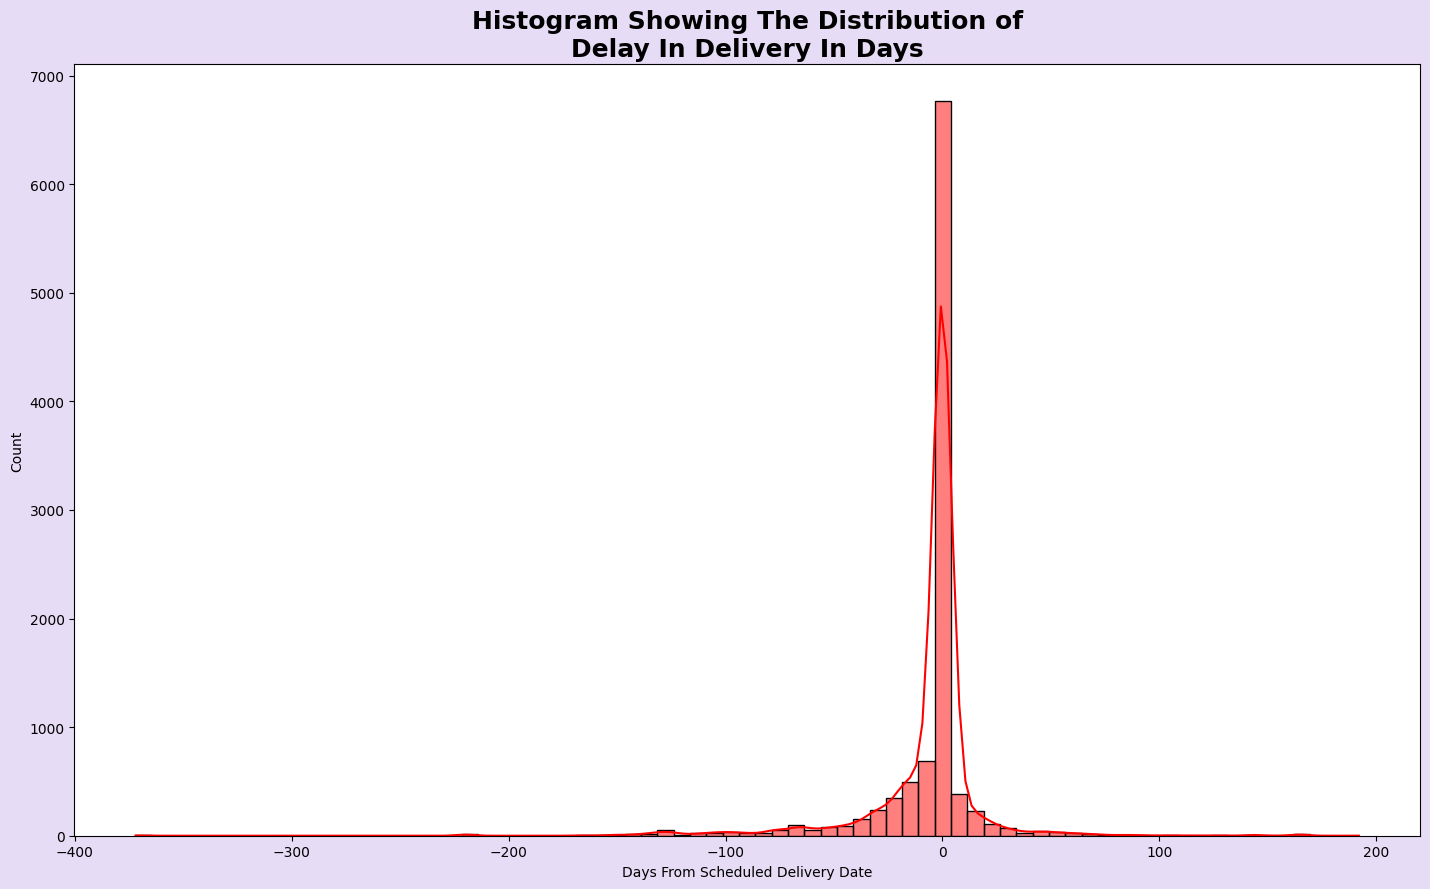

In [299]:
fig,ax=plt.subplots(figsize=(14.4,9))
sns.histplot(data=fx,x='Delivery_Delay',color='red',kde=True,bins=75,ax=ax)
ax.set_xlabel('Days From Scheduled Delivery Date')
ax.set_title('Histogram Showing The Distribution of\nDelay In Delivery In Days',fontdict={'fontweight':'bold','fontsize':18})
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("1.png", dpi=300, bbox_inches="tight")
plt.show()

From the histogram it is seen that the majority of the datapoints for delivery delay or early delivery lie between 150 days early and ~75 days delay. So, removing all values higher than 75 or lower than -150 to not skew the analysis.

In [300]:
fx = fx[(fx['Delivery_Delay']>=-150)&(fx['Delivery_Delay']<=75)]
fx_rdc = fx_rdc[(fx_rdc['Delivery_Delay']>=-150)&(fx_rdc['Delivery_Delay']<=75)]
fx_freight = fx_freight[(fx_freight['Delivery_Delay']>=-150)&(fx_freight['Delivery_Delay']<=75)]
fx_weights = fx_weights[(fx_weights['Delivery_Delay']>=-150)&(fx_weights['Delivery_Delay']<=75)]

### Chart 2

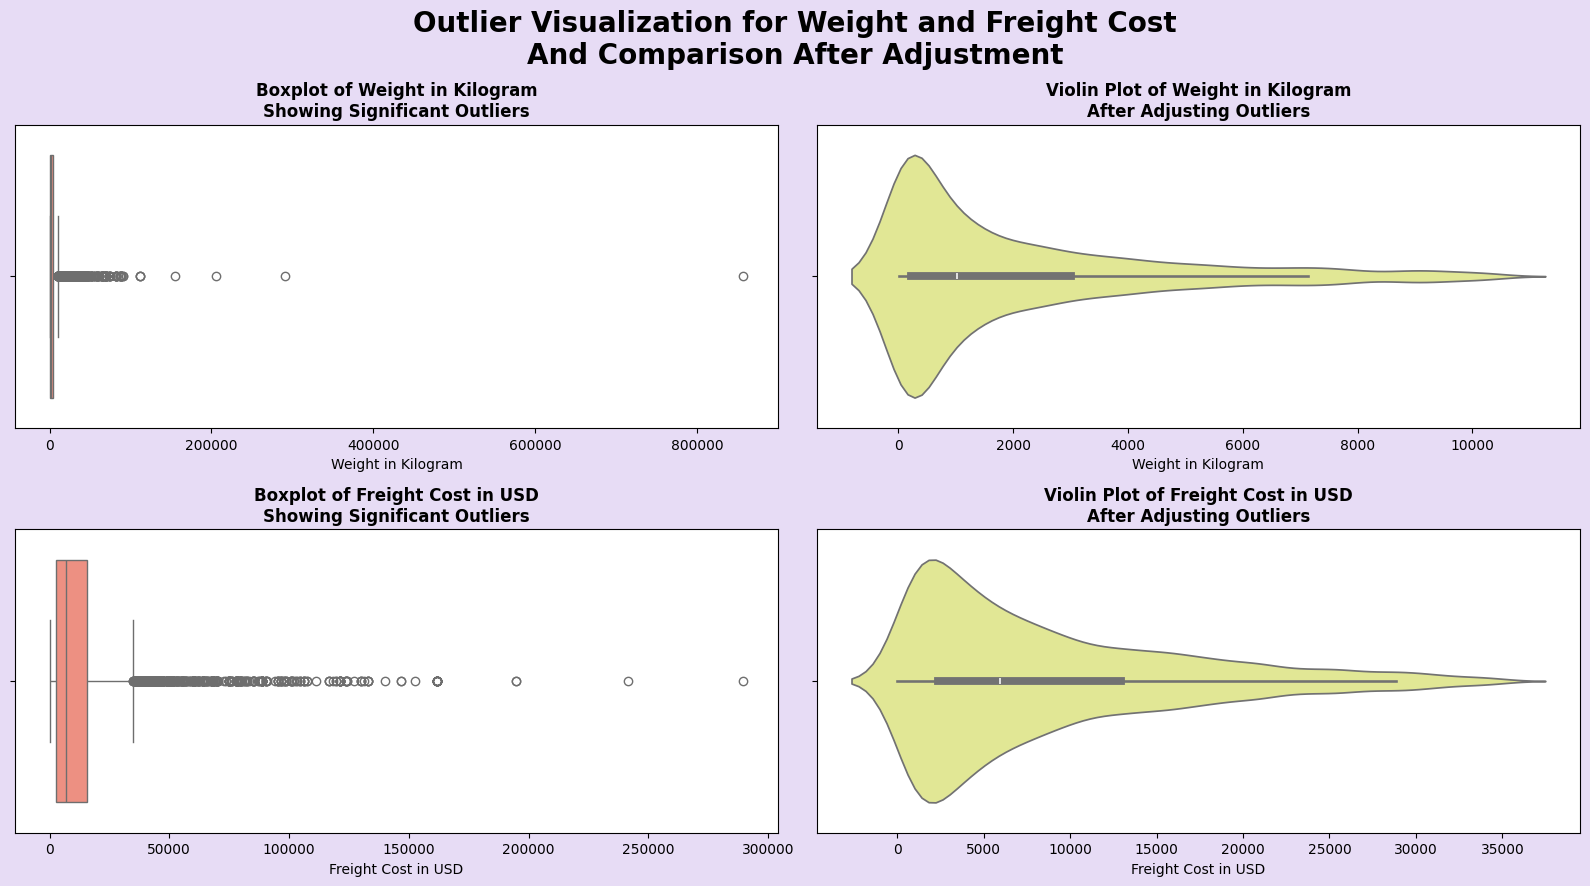

In [301]:
fig,ax=plt.subplots(2,2,figsize=(16,9))

fig.patch.set_facecolor("#e7dcf5")

sns.boxplot(data=fx[fx['Weight_Cleaned'].isnull()==False],x='Weight_Cleaned',ax=ax[0,0],color='#FF8370')
ax[0,0].set_xlabel('Weight in Kilogram')
ax[0,0].set_title('Boxplot of Weight in Kilogram\nShowing Significant Outliers',fontdict={'fontweight':'semibold'})

sns.violinplot(data=fx[(fx['Weight_Cleaned'].isnull()==False)&(fx['Weight_Cleaned']<10469)&(fx['Weight_Cleaned']>0)],x='Weight_Cleaned',ax=ax[0,1],color='#EDF587')
ax[0,1].set_xlabel('Weight in Kilogram')
ax[0,1].set_title('Violin Plot of Weight in Kilogram\nAfter Adjusting Outliers',fontdict={'fontweight':'semibold'})

sns.boxplot(data=fx[fx['Freight_Cost_Clean'].isnull()==False],x='Freight_Cost_Clean',ax=ax[1,0],color='#FF8370')
ax[1,0].set_xlabel('Freight Cost in USD')
ax[1,0].set_title('Boxplot of Freight Cost in USD\nShowing Significant Outliers',fontdict={'fontweight':'semibold'})

sns.violinplot(data=fx[(fx['Freight_Cost_Clean'].isnull()==False)&(fx['Freight_Cost_Clean']<34879)&(fx['Freight_Cost_Clean']>0)],x='Freight_Cost_Clean',ax=ax[1,1],color='#EDF587')
ax[1,1].set_xlabel('Freight Cost in USD')
ax[1,1].set_title('Violin Plot of Freight Cost in USD\nAfter Adjusting Outliers',fontdict={'fontweight':'semibold'})

plt.suptitle('Outlier Visualization for Weight and Freight Cost\nAnd Comparison After Adjustment',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.savefig("2.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- The **boxplots (left side)** reveal that both **Weight** and **Freight Cost** have extreme outliers far above the typical range, stretching values into hundreds of thousands.  
- These extreme points heavily distort the scale, making it difficult to observe the actual distribution of most shipments.  
- After adjusting/removing outliers, the **violin plots (right side)** show much more compact and interpretable distributions.  
  - **Weight** centers around a few thousand kilograms, with most shipments below ~10,000 Kg.  
  - **Freight Cost** largely falls below ~12,000 USD, with clear concentration around the lower cost ranges.  

---

#### Business Takeaway  

- **Outlier shipments are rare but massively distort analysis** — likely representing unusual or special freight (e.g., bulk loads, special charters, or data entry errors).  
- By adjusting for these outliers, FedEx can:  
  - Better understand **typical cost and weight ranges**, which represent the majority of shipments.  
  - Identify **high-cost / high-weight exceptions** for closer monitoring, contract renegotiation, or operational review.  
- From a business perspective, **removing noise caused by extreme outliers helps optimize forecasting, cost modeling, and capacity planning**, while still keeping track of outlier cases as **risk factors** in logistics.  

### Chart 3

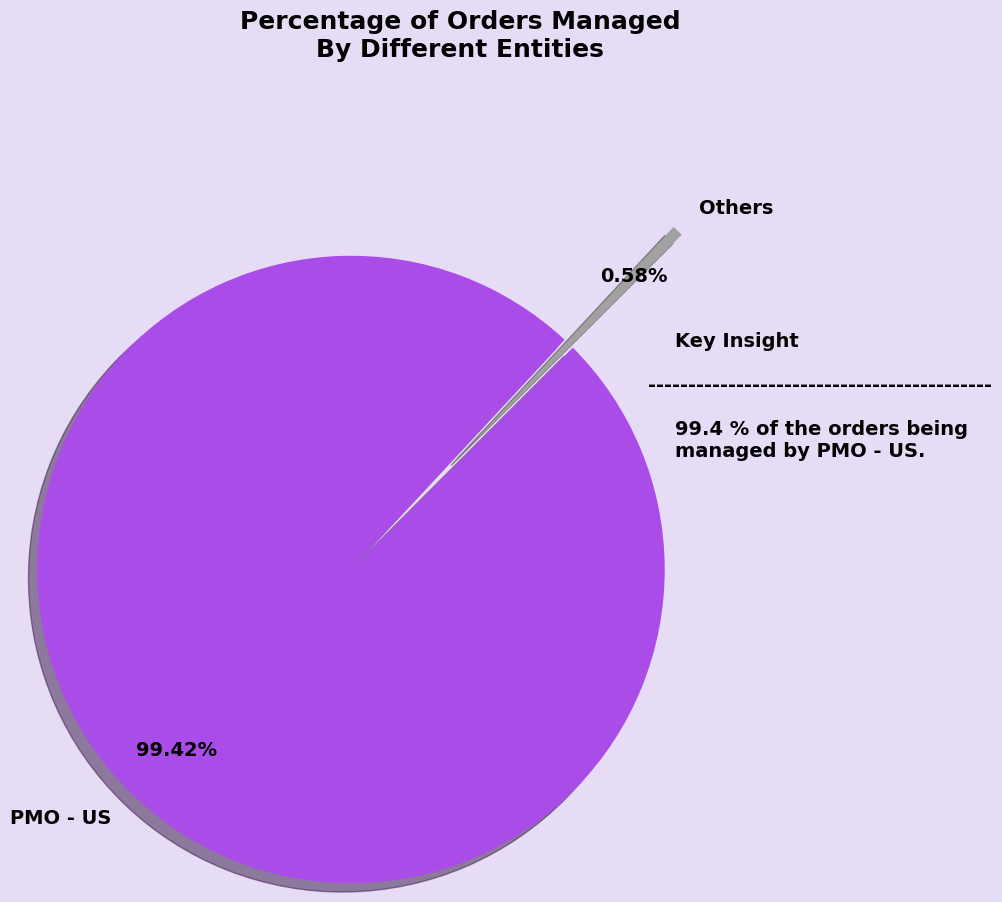

In [302]:
fig, ax = plt.subplots(figsize=(16,9))

ax.pie(x=fx.groupby('Managed_By_Clean')['ID'].count().reset_index()['ID'],labels=fx.groupby('Managed_By_Clean')['ID'].count().reset_index()['Managed_By_Clean'],autopct="%1.2f%%",explode=[0,0.5],colors=['#A1A1A1','#AA4DE8'],pctdistance=0.8,textprops={'fontsize':14,'weight':'bold'},startangle=45,shadow=True)
ax.text(0.6,0,"    Key Insight\n\n-------------------------------------------\n\n    99.4 % of the orders being\n    managed by PMO - US.",fontsize=14,fontweight='semibold')
ax.set_title('Percentage of Orders Managed\nBy Different Entities',fontdict={'fontsize':18,'fontweight':'bold'})


fig.patch.set_facecolor("#e7dcf5")

plt.tight_layout()
plt.savefig("3.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation
- The **PMO – US** overwhelmingly manages shipments, accounting for **99.42%** of all orders.  
- Other entities contribute negligibly, with less than **1%** of total orders under their management.  
- This indicates a highly centralized management structure for shipments, dominated by PMO – US.  

---

#### Business Takeaway
- The extreme concentration of order management in **PMO – US** reflects operational dependence on a single entity.  
- While this centralization may enable **consistency, control, and standardization**, it also creates a **single point of risk** — any disruption at PMO – US could severely impact global operations.  
- FedEx (or any business in this model) should evaluate whether to **diversify management responsibilities** across other PMOs or maintain this centralized approach but with stronger **risk mitigation strategies**.  

### Chart 4

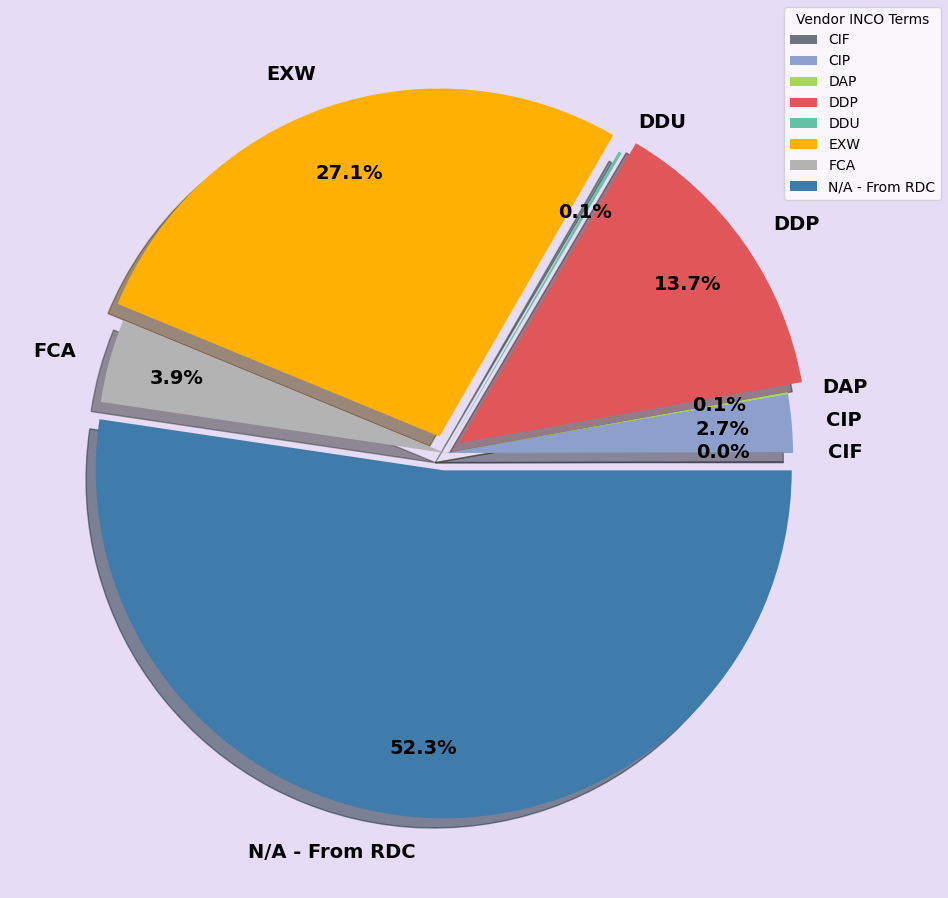

In [303]:
colors = ["#6C757D","#8DA0CB","#A6D854","#E15759","#66C2A5","#FFB000","#B3B3B3","#3F7CAC"]

fig,ax=plt.subplots(figsize=(10,9))
ax.pie(x=fx.groupby('Vendor_INCO')['ID'].count().reset_index(name='No_of_Orders')['No_of_Orders'],labels=fx.groupby('Vendor_INCO')['ID'].count().reset_index(name='No_of_Orders')['Vendor_INCO'],autopct='%1.1f%%',pctdistance=0.8,explode=[0,0,0,0.05,0,0.05,0,0.05],shadow=True,colors=colors,textprops={'fontsize':14,'weight':'bold'})
fig.patch.set_facecolor("#e7dcf5")
fig.legend(title='Vendor INCO Terms')
plt.tight_layout()
plt.savefig("4.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation
The pie chart shows that **most shipments (52.3%) are handled via N/A – From RDC**, while **EXW (Ex Works) accounts for 27.1%** and **DDP (Delivered Duty Paid) for 13.7%**. Together, these three terms dominate the shipment landscape. Other INCO terms such as FCA, CIP, and DDU represent only a very small fraction of total shipments.  

This concentration suggests that the logistics process is heavily dependent on a few contractual arrangements, with RDC handling forming the backbone of fulfillment.  

---

#### Business Takeaway
FedEx can leverage these insights to:  
- **Prioritize operational efficiency** around RDC-driven shipments since they form the bulk of the business.  
- **Optimize cost and risk management strategies** around EXW and DDP, as they are the next largest contributors.  
- **Evaluate underutilized INCO terms** (like CIP, DDU, DAP) to determine whether they can be standardized, phased out, or restructured for better alignment with logistics goals.  

By focusing on the dominant INCO terms while reassessing the less frequent ones, FedEx can **streamline vendor negotiations, reduce complexity, and improve delivery reliability** across its supply chain.  

## Multivariate Analysis

### Chart 1

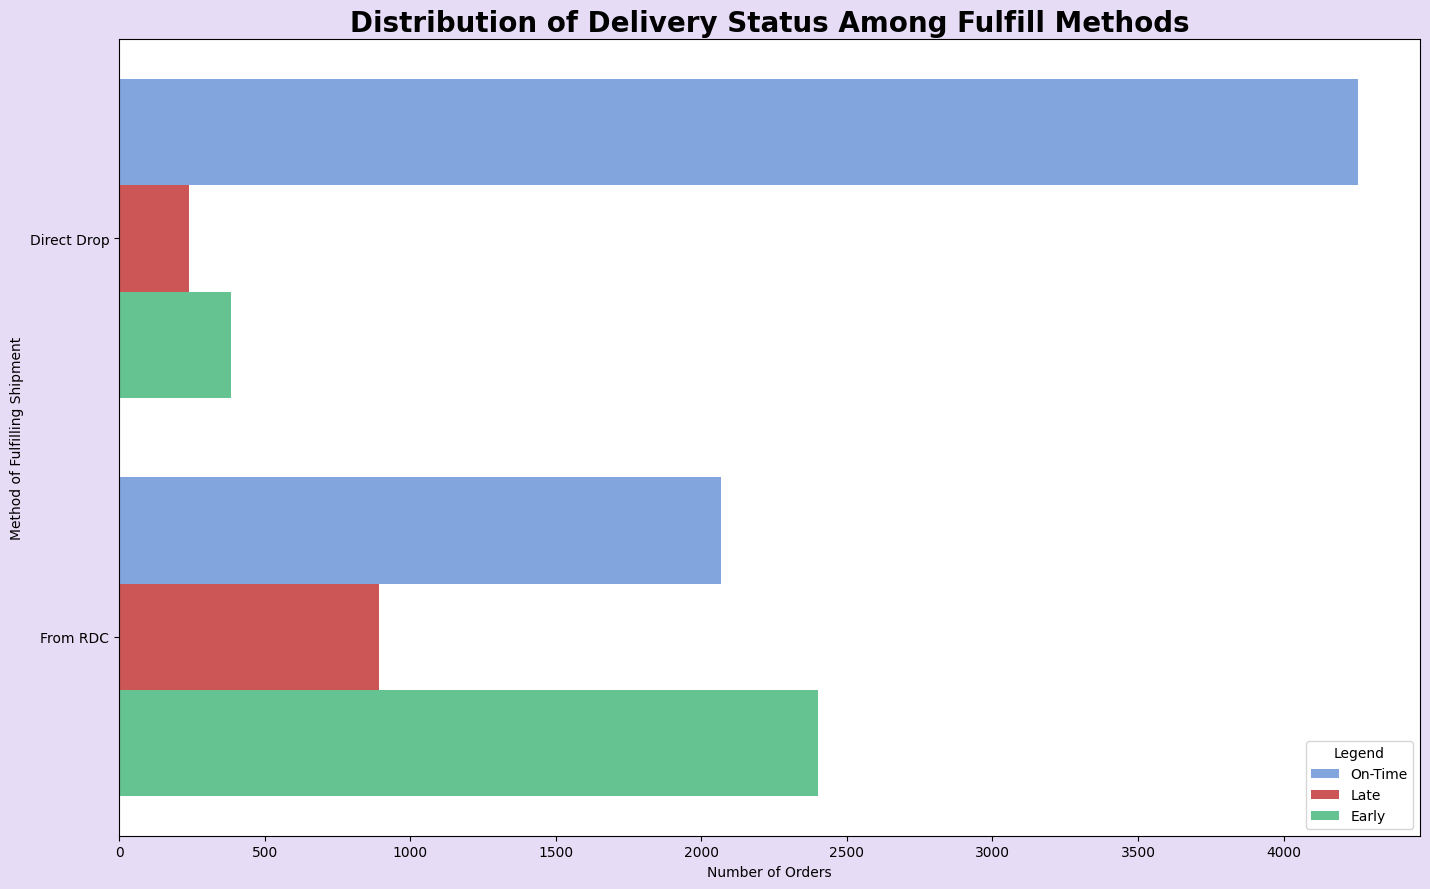

In [304]:
fig,ax=plt.subplots(figsize=(14.4,9))
sns.countplot(data=fx,y='Fulfill_Via',hue='Delivery_Status',palette={'Early':'#56D190','On-Time':'#74A1ED','Late':'#E04141'},ax=ax)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Method of Fulfilling Shipment')
ax.set_title('Distribution of Delivery Status Among Fulfill Methods',fontdict={'fontsize':20,'fontweight':'bold'})
ax.legend(title='Legend')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("5.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation of Delivery Status by Fulfillment Method  

- **Direct Drop**  
  - Majority of shipments are **On-Time**.  
  - Very few are **Early** or **Late** → shows strong consistency.  
  - Overall, the most reliable fulfillment method.  

- **From RDC (Regional Distribution Center)**  
  - On-Time deliveries are lower compared to Direct Drop.  
  - Noticeably higher share of **Early deliveries**.  
  - Substantially more **Late deliveries** → RDC adds variability and risk.  

- **Comparative Patterns**  
  - **Direct Drop = precision** → customers get shipments on time, consistently.  
  - **RDC = variability** → higher chance of both early and late deliveries, fewer staying exactly on time.  
  - Indicates RDC introduces logistical complexity that creates both opportunities for early dispatch and risks for delays.  

---

#### Business Takeaways  

- **Direct Drop should be prioritized for time-sensitive shipments** (especially medical/first-line use).  
- **RDC operations need optimization**:  
  - Too many late deliveries point to bottlenecks at RDC handoffs.  
  - High number of early deliveries may suggest **overcompensation**, leading to downstream inventory imbalance.  
- FedEx can balance **cost vs reliability**:  
  - Use RDC for **bulk or non-urgent shipments**, where early/late arrival is acceptable.  
  - Reserve **Direct Drop for critical shipments**, even if costs are higher.  

---

**Summary:** *Direct Drop = reliability, RDC = variability.*  

### Charts 2 and 3

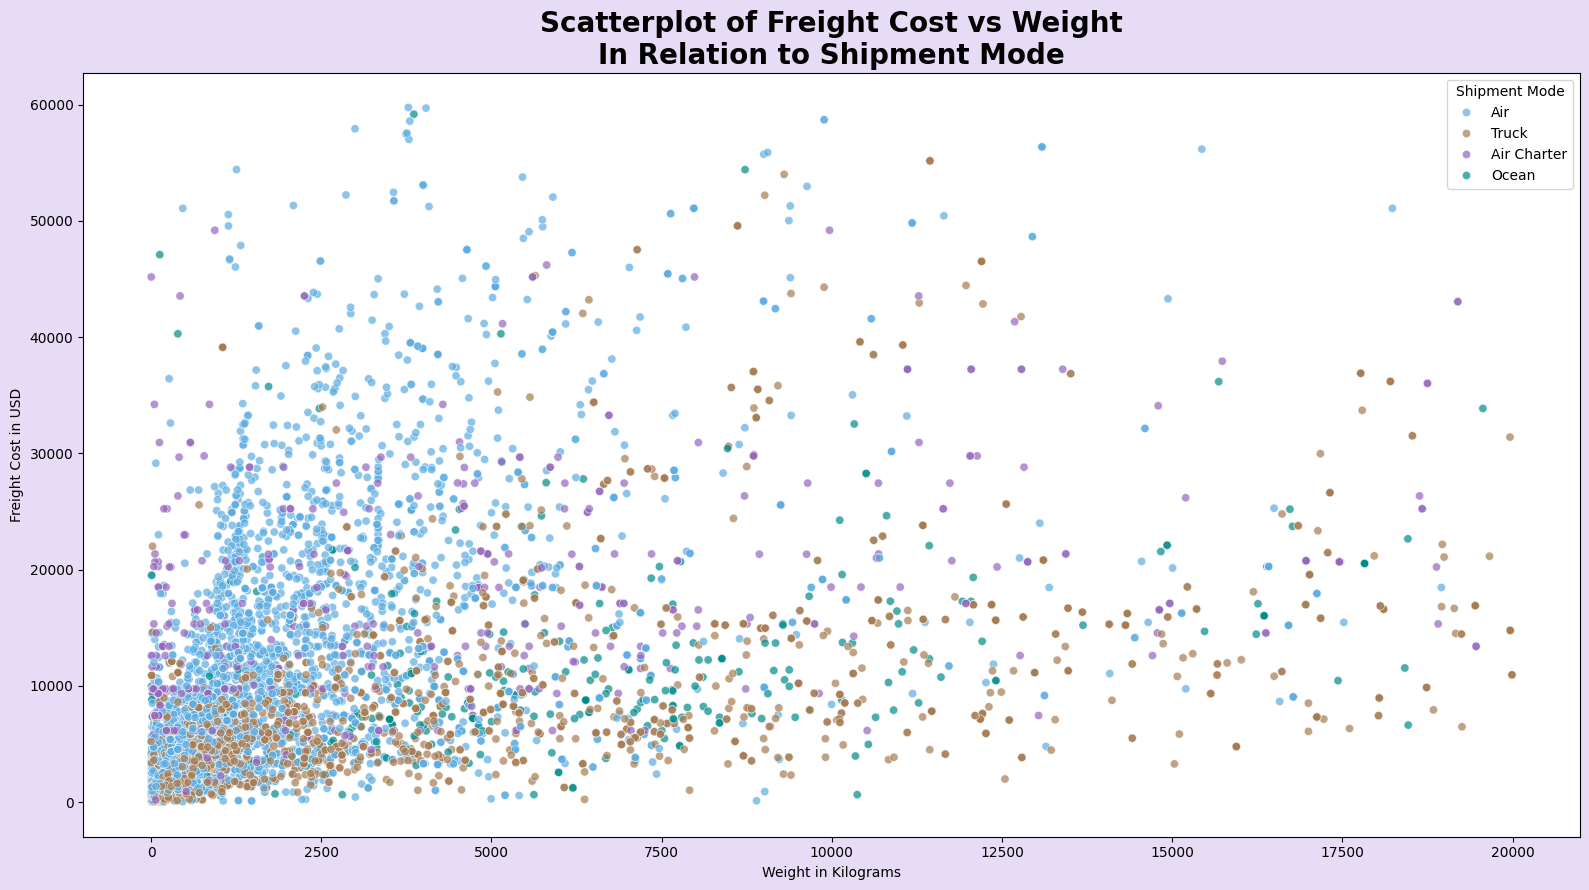

In [305]:
fig,ax=plt.subplots(figsize=(16,9))
color_dict = {'Air':"#5DADE2", 'Air Charter':"#9467bd", 'Ocean':"#008B8B", 'Truck':"#a67c52"}
sns.scatterplot(data=fx[(fx['Weight_Cleaned'].isna()==False)&(fx['Freight_Cost_Clean'].isna()==False)&(fx['Weight_Cleaned']<20000)&(fx['Freight_Cost_Clean']<60000)&(fx['Weight_Cleaned']>0)&(fx['Freight_Cost_Clean']>0)],x='Weight_Cleaned',y='Freight_Cost_Clean',hue='Shipment_Mode',alpha=0.7,ax=ax,palette=color_dict)
ax.set_title('Scatterplot of Freight Cost vs Weight\nIn Relation to Shipment Mode',fontdict={'fontsize':20,'fontweight':'bold'})
ax.set_xlabel('Weight in Kilograms')
ax.set_ylabel('Freight Cost in USD')
ax.legend(title='Shipment Mode')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("6.png", dpi=300, bbox_inches="tight")
plt.show()

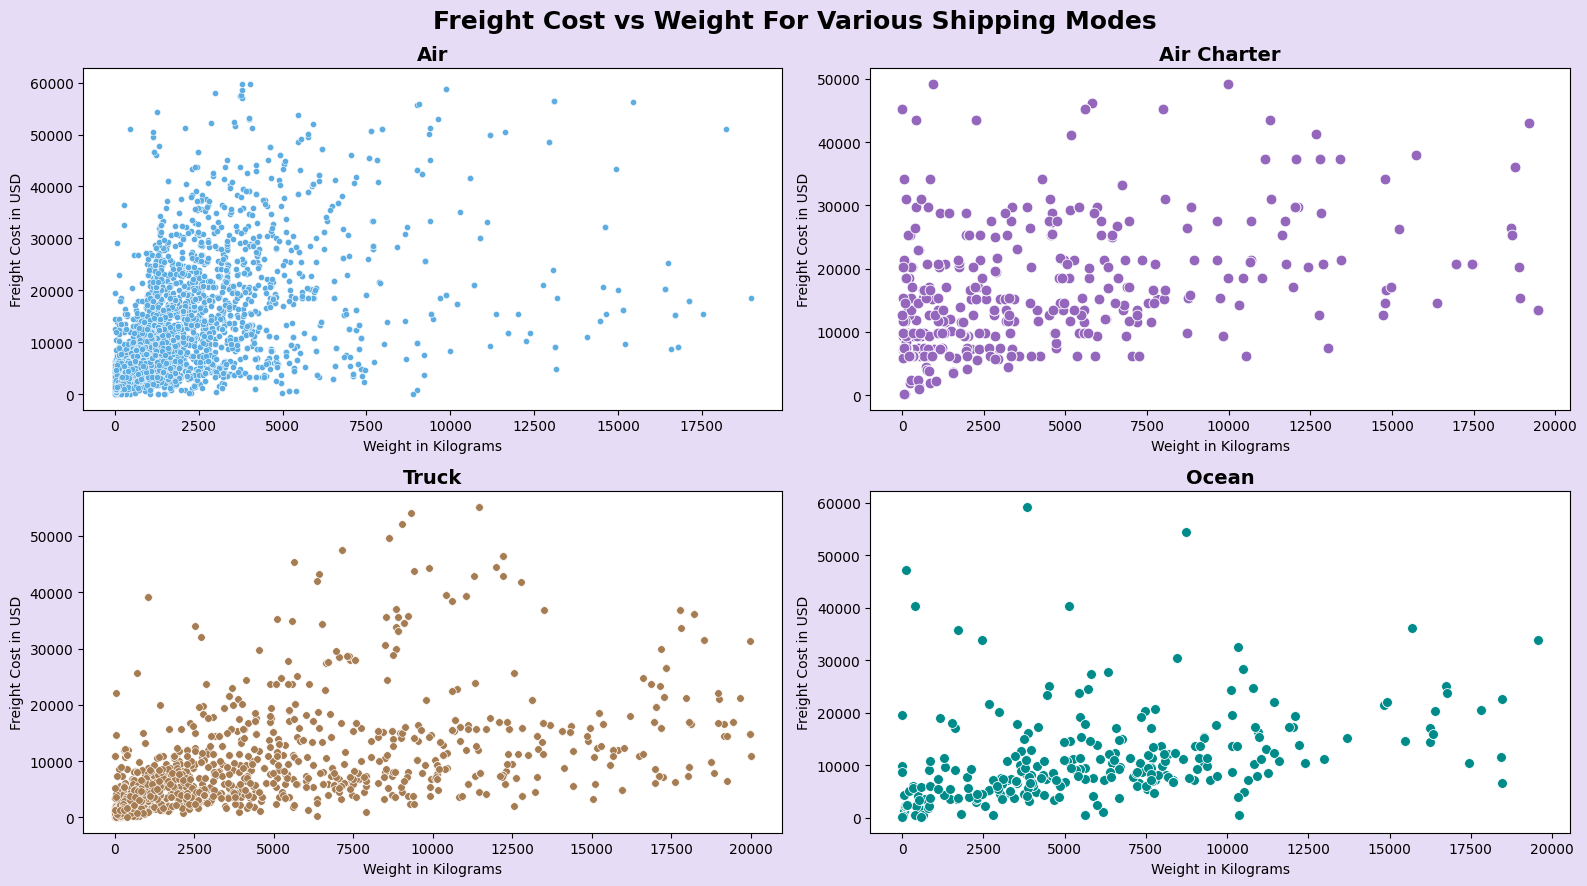

In [306]:
fig,ax=plt.subplots(2,2,figsize=(16,9))

color = ["#5DADE2", "#9467bd", "#008B8B", "#a67c52"]

fig.patch.set_facecolor("#e7dcf5")

sns.scatterplot(data=fx[(fx['Weight_Cleaned'].isna()==False)&(fx['Freight_Cost_Clean'].isna()==False)&(fx['Weight_Cleaned']<20000)&(fx['Freight_Cost_Clean']<60000)&(fx['Weight_Cleaned']>0)&(fx['Freight_Cost_Clean']>0)&(fx['Shipment_Mode']=='Air')],x='Weight_Cleaned',y='Freight_Cost_Clean',ax=ax[0,0],color=color[0],s=20)
ax[0,0].set_xlabel('Weight in Kilograms')
ax[0,0].set_ylabel('Freight Cost in USD')
ax[0,0].set_title('Air',fontdict={'fontsize':14,'fontweight':'semibold'})

sns.scatterplot(data=fx[(fx['Weight_Cleaned'].isna()==False)&(fx['Freight_Cost_Clean'].isna()==False)&(fx['Weight_Cleaned']<20000)&(fx['Freight_Cost_Clean']<60000)&(fx['Weight_Cleaned']>0)&(fx['Freight_Cost_Clean']>0)&(fx['Shipment_Mode']=='Air Charter')],x='Weight_Cleaned',y='Freight_Cost_Clean',ax=ax[0,1],color=color[1],s=60)
ax[0,1].set_xlabel('Weight in Kilograms')
ax[0,1].set_ylabel('Freight Cost in USD')
ax[0,1].set_title('Air Charter',fontdict={'fontsize':14,'fontweight':'semibold'})

sns.scatterplot(data=fx[(fx['Weight_Cleaned'].isna()==False)&(fx['Freight_Cost_Clean'].isna()==False)&(fx['Weight_Cleaned']<20000)&(fx['Freight_Cost_Clean']<60000)&(fx['Weight_Cleaned']>0)&(fx['Freight_Cost_Clean']>0)&(fx['Shipment_Mode']=='Truck')],x='Weight_Cleaned',y='Freight_Cost_Clean',ax=ax[1,0],color=color[3],s=30)
ax[1,0].set_xlabel('Weight in Kilograms')
ax[1,0].set_ylabel('Freight Cost in USD')
ax[1,0].set_title('Truck',fontdict={'fontsize':14,'fontweight':'semibold'})

sns.scatterplot(data=fx[(fx['Weight_Cleaned'].isna()==False)&(fx['Freight_Cost_Clean'].isna()==False)&(fx['Weight_Cleaned']<20000)&(fx['Freight_Cost_Clean']<60000)&(fx['Weight_Cleaned']>0)&(fx['Freight_Cost_Clean']>0)&(fx['Shipment_Mode']=='Ocean')],x='Weight_Cleaned',y='Freight_Cost_Clean',ax=ax[1,1],color=color[2],s=50)
ax[1,1].set_xlabel('Weight in Kilograms')
ax[1,1].set_ylabel('Freight Cost in USD')
ax[1,1].set_title('Ocean',fontdict={'fontsize':14,'fontweight':'semibold'})

fig.suptitle('Freight Cost vs Weight For Various Shipping Modes',fontsize=18,fontweight='bold')
plt.tight_layout()
plt.savefig("7.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

Looking at the **combined scatterplot**, a strong positive relationship between shipment **weight** and **freight cost** is clear across all modes. However, the density and spread differ by mode:  

- **Air** dominates across nearly all weight ranges, with costs scaling sharply as weight increases.  
- **Truck** shipments show a wide distribution but tend to remain relatively cheaper at comparable weights, especially in the low-to-mid range.  
- **Ocean** shipments handle heavier consignments at significantly lower costs, reflecting the bulk-shipment economics of sea freight.  
- **Air Charter** stands out as an outlier: costs are consistently high even for moderate weights, reflecting its emergency/priority use cases.  

When broken down into **separate subplots**, these differences are clearer:  
- **Air** → high variability, but consistently more expensive as weight rises.  
- **Truck** → cost-effective, but scattered with occasional spikes.  
- **Ocean** → the cheapest option for heavy shipments.  
- **Air Charter** → niche, high-cost regardless of weight.  

---

#### Business Takeaway  

- **Air is indispensable** for speed but drives up logistics costs, even at lower weights.  
- **Truck offers balance** for regional or land-based deliveries, with competitive costs at mid weights.  
- **Ocean is the most cost-efficient** for heavy, bulk shipments, though less suited for urgent needs.  
- **Air Charter is a premium solution**, best reserved for high-priority medical or time-critical consignments.  

Together, these insights suggest an **optimized logistics mix**:  
- Use **Air** selectively for time-sensitive shipments,  
- **Truck** for regional cost balance,  
- **Ocean** for heavy, non-urgent cargo,  
- and **Air Charter only for emergencies** where speed outweighs cost.  

### Chart 4

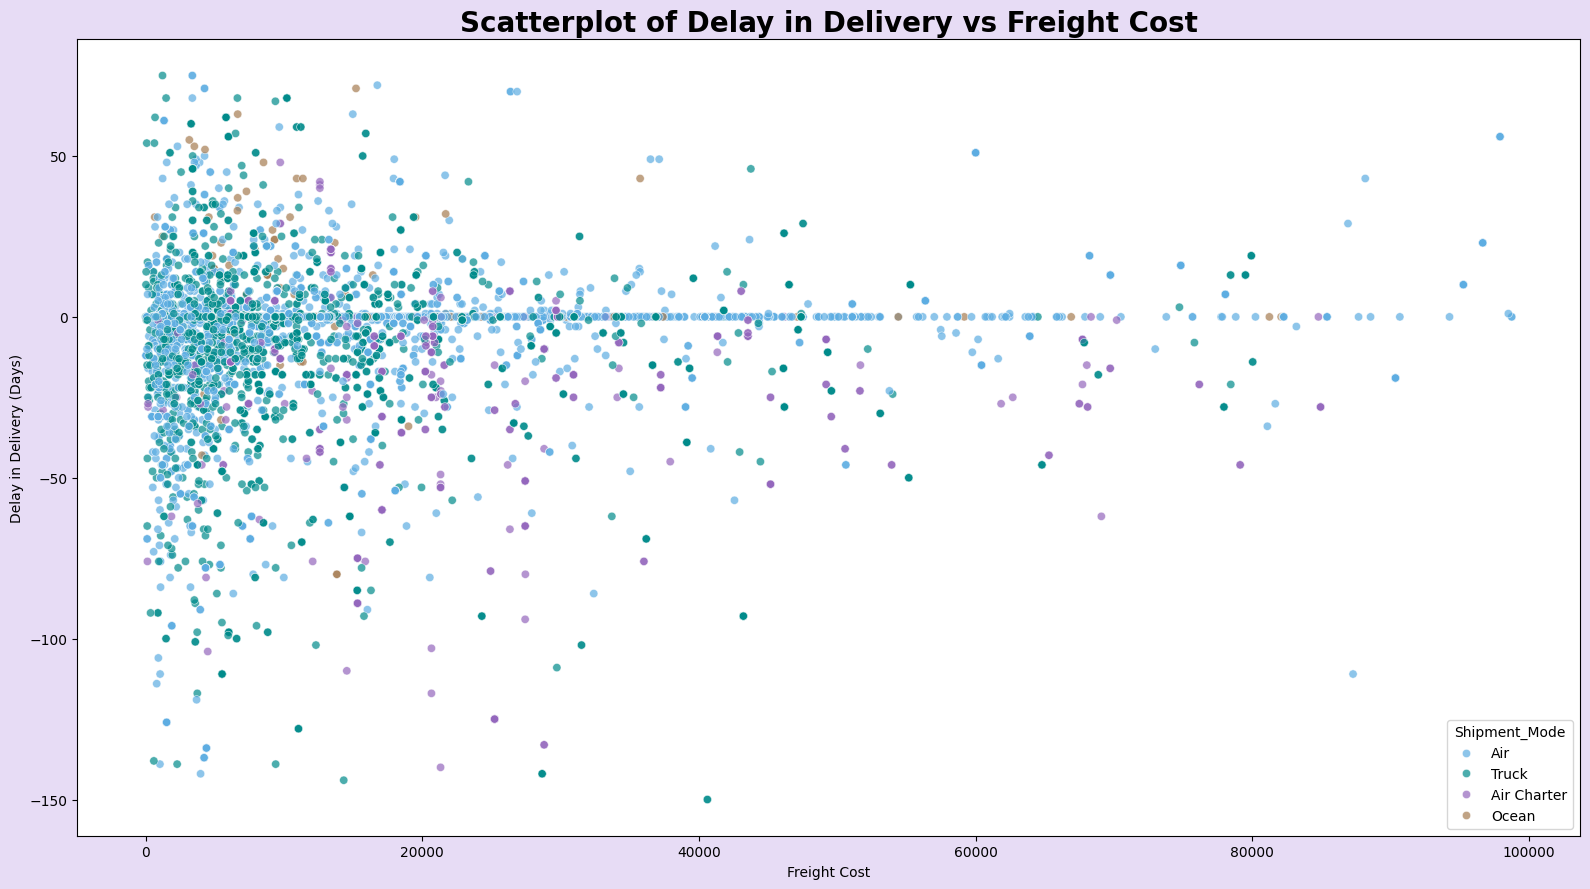

In [307]:
fig,ax=plt.subplots(figsize=(16,9))
color_dict = {'Air':"#5DADE2", 'Air Charter':"#9467bd", 'Truck':"#008B8B", 'Ocean':"#a67c52"}
sns.scatterplot(data=fx_freight[fx_freight['Freight_Cost_Clean']<100000],x='Freight_Cost_Clean',y='Delivery_Delay',hue='Shipment_Mode',alpha=0.7,ax=ax,palette=color_dict)
ax.set_title('Scatterplot of Delay in Delivery vs Freight Cost',fontdict={'fontsize':20,'fontweight':'bold'})
ax.set_xlabel('Freight Cost')
ax.set_ylabel('Delay in Delivery (Days)')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("8.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation
- There is **no strong correlation** between freight cost and delivery delays.  
  - Both high and low freight costs have shipments that are early, on-time, and delayed.  
- Most shipments are concentrated at **lower freight costs (below 20,000)**, where delays (positive and negative) are highly variable.  
- At higher freight costs (>50,000), orders still show **scattered delivery performance**, indicating cost does not guarantee timeliness.  
- Air and Truck dominate across all cost ranges, with Ocean and Air Charter appearing less frequently.  

---

#### Business Takeaway
- Simply **spending more on freight does not reduce delivery delays**, suggesting inefficiencies outside of transport cost (e.g., customs, logistics coordination, or last-mile issues).  
- High-cost modes (Air Charter, Ocean) still face delays, meaning businesses must focus on **process optimization** rather than just premium shipping.  
- FedEx can use this insight to **review service agreements** with high-cost modes and work with clients to identify whether **faster but costlier modes are truly adding value**.  
- The real opportunity lies in **balancing cost and reliability**: optimizing shipment planning, RDC usage, and routing could improve outcomes more effectively than just spending on premium transport.  

### Chart 5

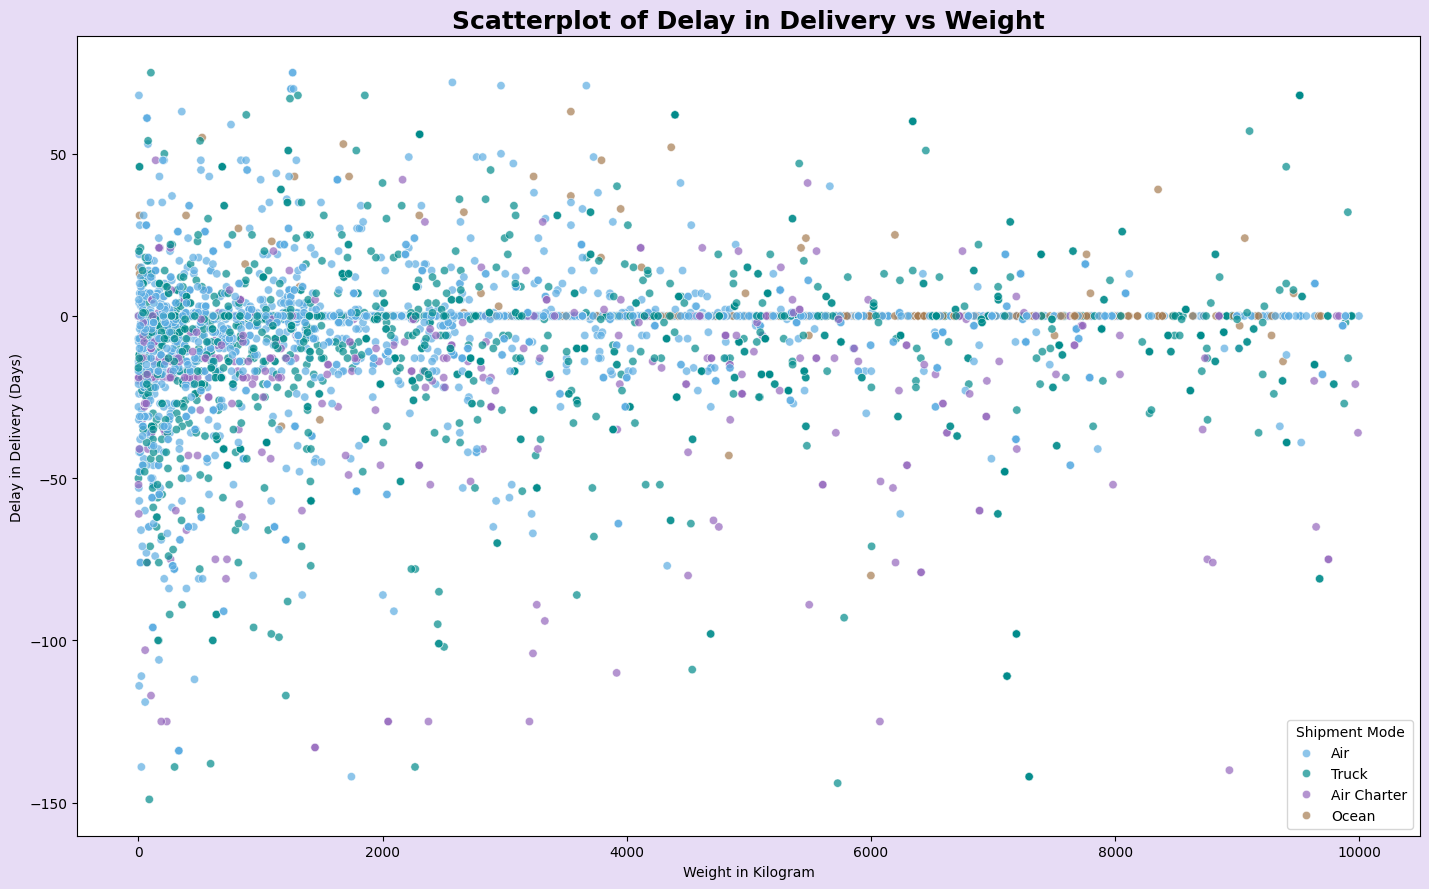

In [308]:
fig,ax=plt.subplots(figsize=(14.4,9))
color_dict = {'Air':"#5DADE2", 'Air Charter':"#9467bd", 'Truck':"#008B8B", 'Ocean':"#a67c52"}
sns.scatterplot(data=fx_weights[fx_weights['Weight_Cleaned']<10000],x='Weight_Cleaned',y='Delivery_Delay',hue='Shipment_Mode',alpha=0.7,ax=ax,palette=color_dict)
ax.set_xlabel('Weight in Kilogram')
ax.set_ylabel('Delay in Delivery (Days)')
ax.set_title('Scatterplot of Delay in Delivery vs Weight',fontdict={'fontsize':18,'fontweight':'bold'})
ax.legend(title='Shipment Mode')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("9.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation of Delay vs Weight Scatterplot

- **Most shipments cluster tightly around zero delay** → the majority are delivered on time.  
- **Spread of delays grows with weight** → heavier consignments (above ~2000 kg) show much greater variability in delivery time.  
- **Early deliveries (negative delays) are frequent**, especially for Truck and Air.  
- **Late deliveries (positive delays) are less frequent but still visible**, with Truck shipments showing the widest scatter.  
- **By shipment mode:**  
  - **Air** → stays close to on-time, fewer extremes → most reliable.  
  - **Truck** → widest vertical scatter (both early and late) → least predictable.  
  - **Air Charter** → smaller sample, highly variable → special-case shipments (urgent, exceptions).  
  - **Ocean** → fewer points overall, but mostly heavier loads with risk of delay.  

---

#### Business Takeaways

- **For critical medical shipments, Air should be the default choice** → it balances speed and reliability.  
- **Trucks contribute the most delivery uncertainty** → FedEx should invest in tighter tracking, buffer scheduling, or RDC staging for truck-based orders.  
- **Heavy consignments drive unpredictability** → splitting shipments or rerouting through RDCs could mitigate risk.  
- **Air Charter needs stricter process controls** → its “all over the place” performance makes it unsuitable for sensitive shipments without contingency.  
- **Ocean is viable only for non-urgent, heavy freight** → not for first-line medical use where timeliness is critical.

### Chart 6

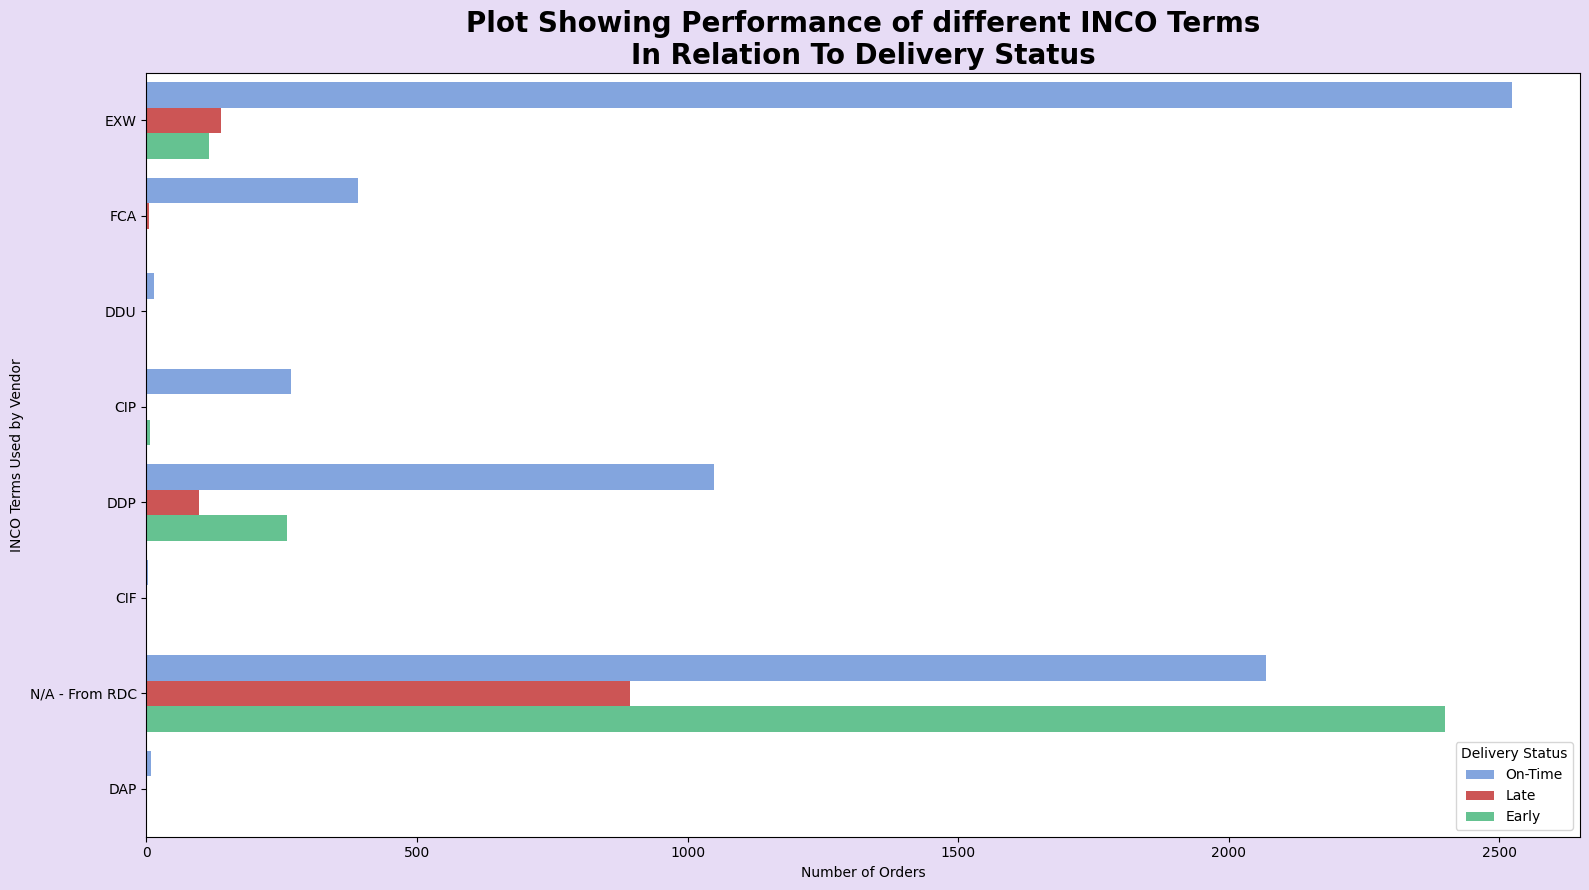

In [309]:
fig,ax=plt.subplots(figsize=(16,9))
sns.countplot(data=fx,y='Vendor_INCO',hue='Delivery_Status',palette={'Early':'#56D190','On-Time':'#74A1ED','Late':'#E04141'},ax=ax)
ax.set_title('Plot Showing Performance of different INCO Terms\nIn Relation To Delivery Status',fontdict={'fontsize':20,'fontweight':'bold'})
ax.set_xlabel('Number of Orders')
ax.set_ylabel('INCO Terms Used by Vendor')
ax.legend(title='Delivery Status',loc='lower right')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("10.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation
- **EXW (Ex Works)** has the largest number of shipments and shows a high proportion of **on-time deliveries**, but still has a notable chunk of late and early deliveries.  
- **N/A – From RDC** stands out with a balanced mix of **on-time, early, and late deliveries**, but it also carries a significantly large number of early deliveries, making it less predictable.  
- **DDP (Delivered Duty Paid)** shows a relatively balanced spread but has a higher percentage of early deliveries compared to EXW.  
- Other INCO terms like **FCA** and **CIP** contribute smaller shipment volumes, and their performance is generally skewed towards on-time, though not as dominant as EXW.  
- Rarely used terms such as **DDU, CIF, DAP** are almost negligible in shipment volume, making them insignificant in terms of overall performance impact.

---

#### Business Takeaway
- **EXW emerges as the most reliable and dominant INCO term**, handling the majority of shipments with strong on-time delivery performance, making it the preferred choice for logistics planning.  
- **N/A – From RDC, while heavily used, shows unpredictability due to a large share of early deliveries**, which may affect inventory management and planning at receiving locations.  
- **DDP offers a middle ground**, with some reliability but a higher likelihood of early deliveries, which could be leveraged for time-sensitive shipments if early arrivals are beneficial.  
- For optimization, FedEx could **focus on standardizing around EXW for critical shipments** while **investigating the causes of variability in RDC shipments** to improve predictability and reduce inefficiencies.  

### Chart 7

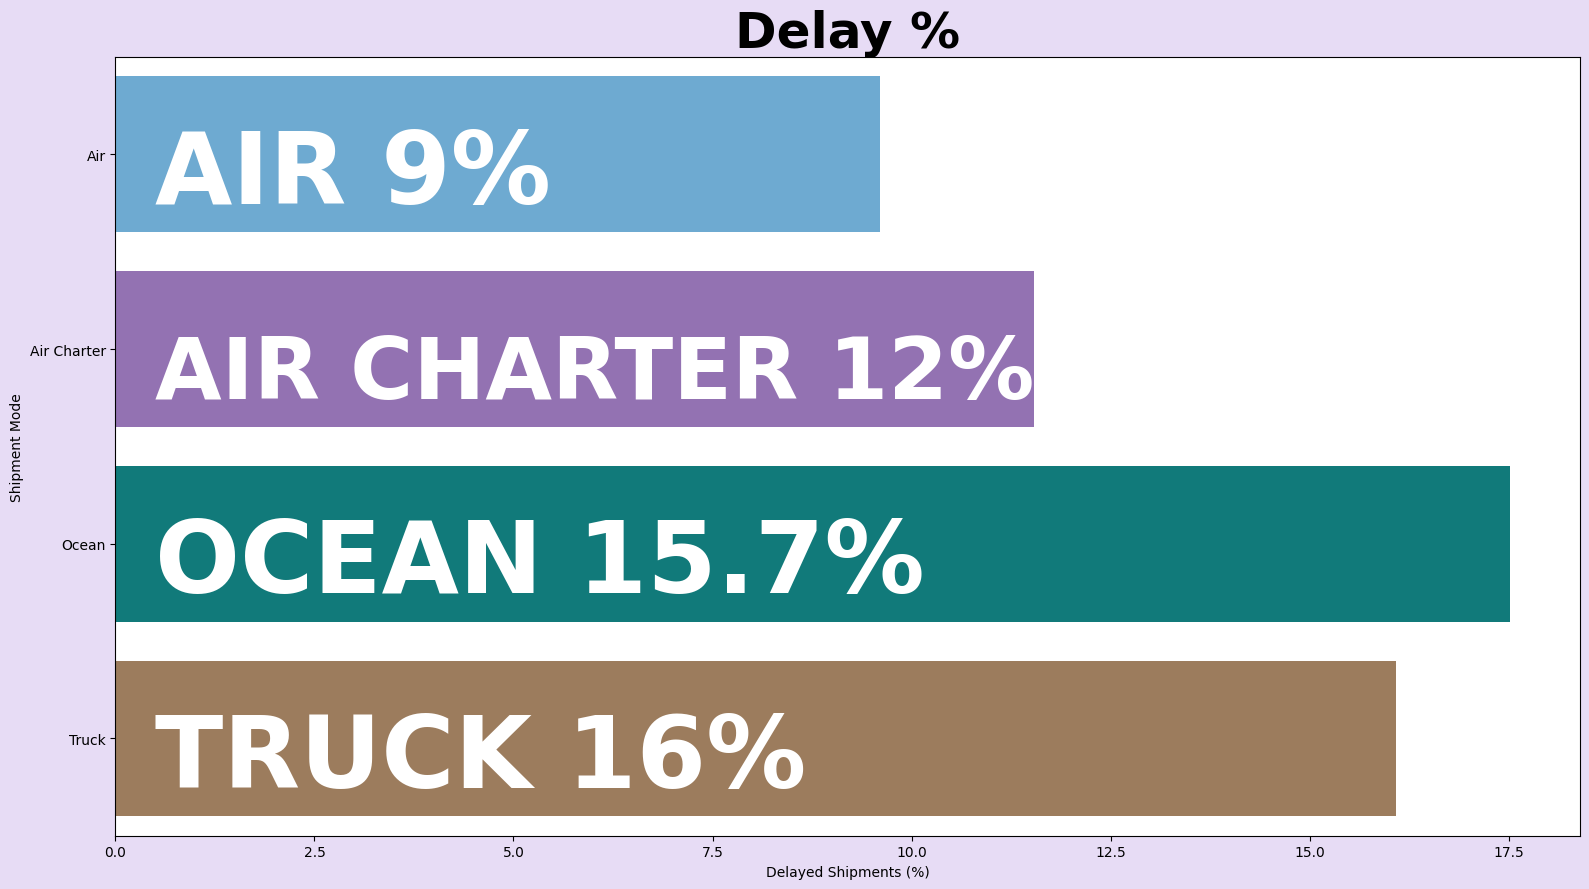

In [310]:
fig,ax=plt.subplots(figsize=(16,9))
sns.barplot(data=fx_ship,y='Shipment_Mode',x='Delay_Pct',hue='Shipment_Mode',palette=color,ax=ax)
ax.text(0.5,0.25,'AIR 9%',fontsize=72,fontweight='bold',color='white')
ax.text(0.5,1.25,'AIR CHARTER 12%',fontsize=62,fontweight='semibold',color='white')
ax.text(0.5,2.25,'OCEAN 15.7%',fontsize=72,fontweight='bold',color='white')
ax.text(0.5,3.25,'TRUCK 16%',fontsize=72,fontweight='bold',color='white')
ax.set_title('Delay %',fontdict={'fontsize':36,'fontweight':'bold'})
ax.set_xlabel('Delayed Shipments (%)')
ax.set_ylabel('Shipment Mode')
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.savefig("11.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- **Air** has the lowest delay rate at **9%**, making it the most reliable mode overall.  
- **Air Charter** comes next at **12%**, showing that while it is faster and premium-priced, it is not immune to operational delays.  
- **Ocean shipments** face a higher delay rate at **15.7%**, reflecting the slower and often unpredictable nature of sea freight.  
- **Truck shipments** have the highest delay rate at **16%**, likely due to congestion, distance, and land-based disruptions.  

---

#### Business Takeaway  

- **Air remains the best bet** when delivery reliability is critical, especially for sensitive shipments like medical supplies.  
- **Air Charter**, despite its premium cost, offers only marginal reliability improvements over Ocean and Truck — making it best suited for emergencies rather than routine use.  
- **Ocean and Truck shipments need closer monitoring and buffer planning**, as delays are significantly higher.  
- A **balanced logistics mix** is key: use **Air for urgent deliveries**, **Truck for regional reach**, and **Ocean for cost-effective bulk loads** — but always factor in **risk of delays** for the latter two.  

### Chart 8

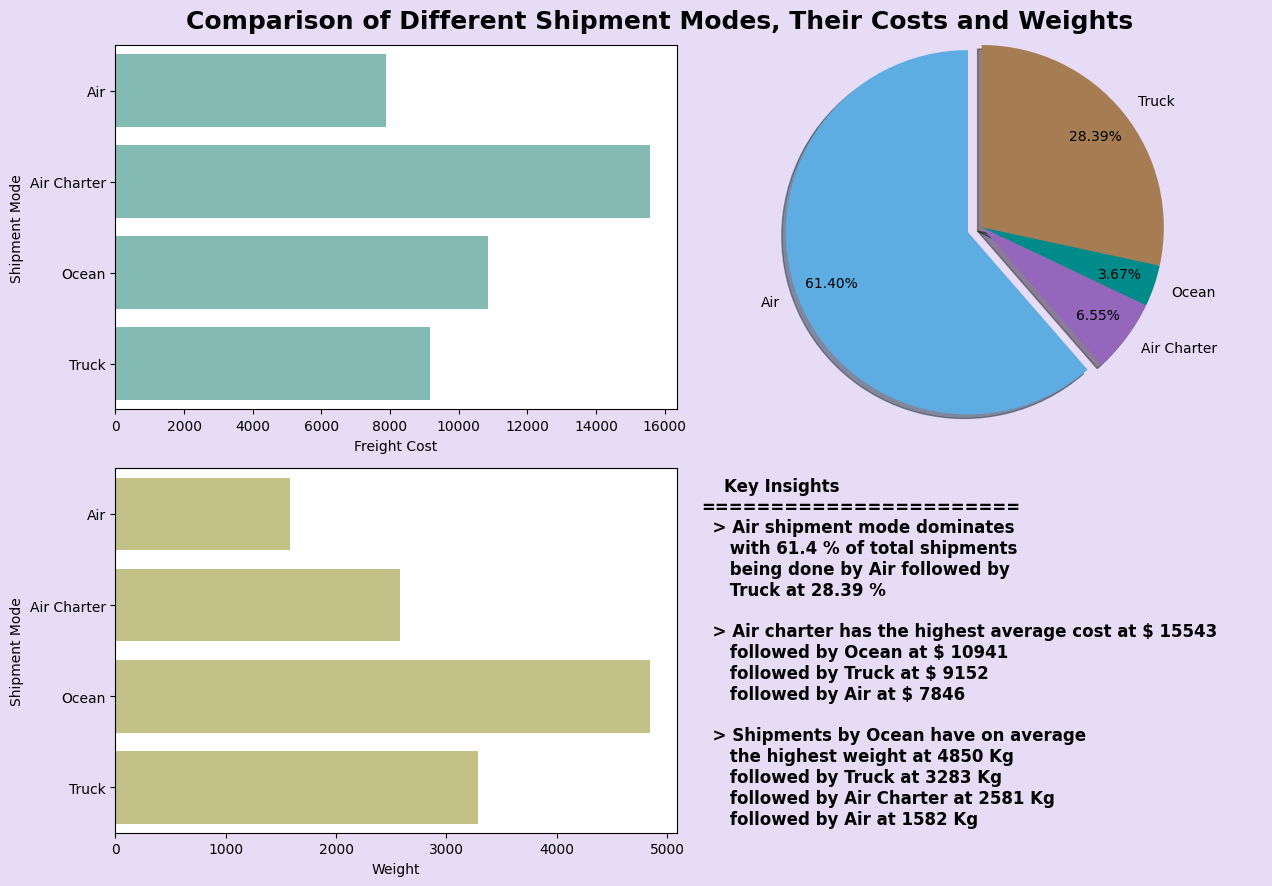

In [311]:
fig, ax = plt.subplots(2,2,figsize=(13.3,9))

fig.patch.set_facecolor("#e7dcf5")

color = ["#5DADE2", "#9467bd", "#008B8B", "#a67c52"]

ax[0,1].pie(x=fx[fx['Shipment_Mode'].isnull()==False]['Shipment_Mode'].value_counts().reset_index().sort_values(by='Shipment_Mode')['count'],labels=fx[fx['Shipment_Mode'].isnull()==False]['Shipment_Mode'].value_counts().reset_index().sort_values(by='Shipment_Mode')['Shipment_Mode'],autopct="%1.2f%%",startangle=90,colors=color,radius=1.25,pctdistance=0.8,explode=[0.1,0,0,0],shadow=True)

sns.barplot(data=fx_scw,y='Shipment_Mode',x='Freight_Cost_Clean',ax=ax[0,0],color='#7AC4BA')
ax[0,0].set_xlabel('Freight Cost')
ax[0,0].set_ylabel('Shipment Mode')

sns.barplot(data=fx_scw,y='Shipment_Mode',x='Weight_Cleaned',ax=ax[1,0],color='#CCCA7E')
ax[1,0].set_xlabel('Weight')
ax[1,0].set_ylabel('Shipment Mode')

ax[1,1].axis("off")

ax[1,1].text(0,0.025,"    Key Insights\n=======================\n  > Air shipment mode dominates\n     with 61.4 % of total shipments\n     being done by Air followed by\n     Truck at 28.39 %\n\n  > Air charter has the highest average cost at $ 15543\n     followed by Ocean at $ 10941\n     followed by Truck at $ 9152\n     followed by Air at $ 7846\n\n  > Shipments by Ocean have on average\n     the highest weight at 4850 Kg\n     followed by Truck at 3283 Kg\n     followed by Air Charter at 2581 Kg\n     followed by Air at 1582 Kg",fontsize=12, fontweight='semibold')

fig.suptitle('Comparison of Different Shipment Modes, Their Costs and Weights',fontsize=18,fontweight='heavy')
fig.tight_layout()
plt.savefig("12.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- **Air** dominates the shipment landscape, accounting for **61.4% of total shipments**, followed by **Truck (28.39%)**, while **Ocean (3.67%)** and **Air Charter (6.55%)** form a much smaller share.  
- **Air Charter** shipments have the **highest average freight cost ($15,543)**, making them the most expensive mode, while **Air ($7,846)** remains significantly cheaper despite handling the bulk of shipments.  
- In terms of shipment **weight**, **Ocean shipments** carry the heaviest loads on average (**~4850 Kg**), followed by **Truck (~3283 Kg)**, **Air Charter (~2581 Kg)**, and **Air (~1582 Kg)**.  

---

#### Business Takeaway  

- **Air remains the primary mode of shipment** for medical supplies due to its speed and reliability, even though it is not the cheapest per weight unit.  
- **Air Charter**, while costly, might be reserved for **critical or urgent medical deliveries**, justifying the higher expense.  
- **Ocean shipments**, although slower, handle the **heaviest loads at moderate cost**, making them suitable for large bulk orders where delivery urgency is lower.  
- **Trucks** strike a balance between **moderate cost and weight capacity**, supporting regional distribution where Air is not viable.  

This insight suggests that **FedEx strategically leverages different shipment modes** — Air for speed, Ocean for bulk, Trucks for regional flexibility, and Air Charter for emergencies — to balance **cost, speed, and reliability** while meeting medical shipment demands.

### Chart 9

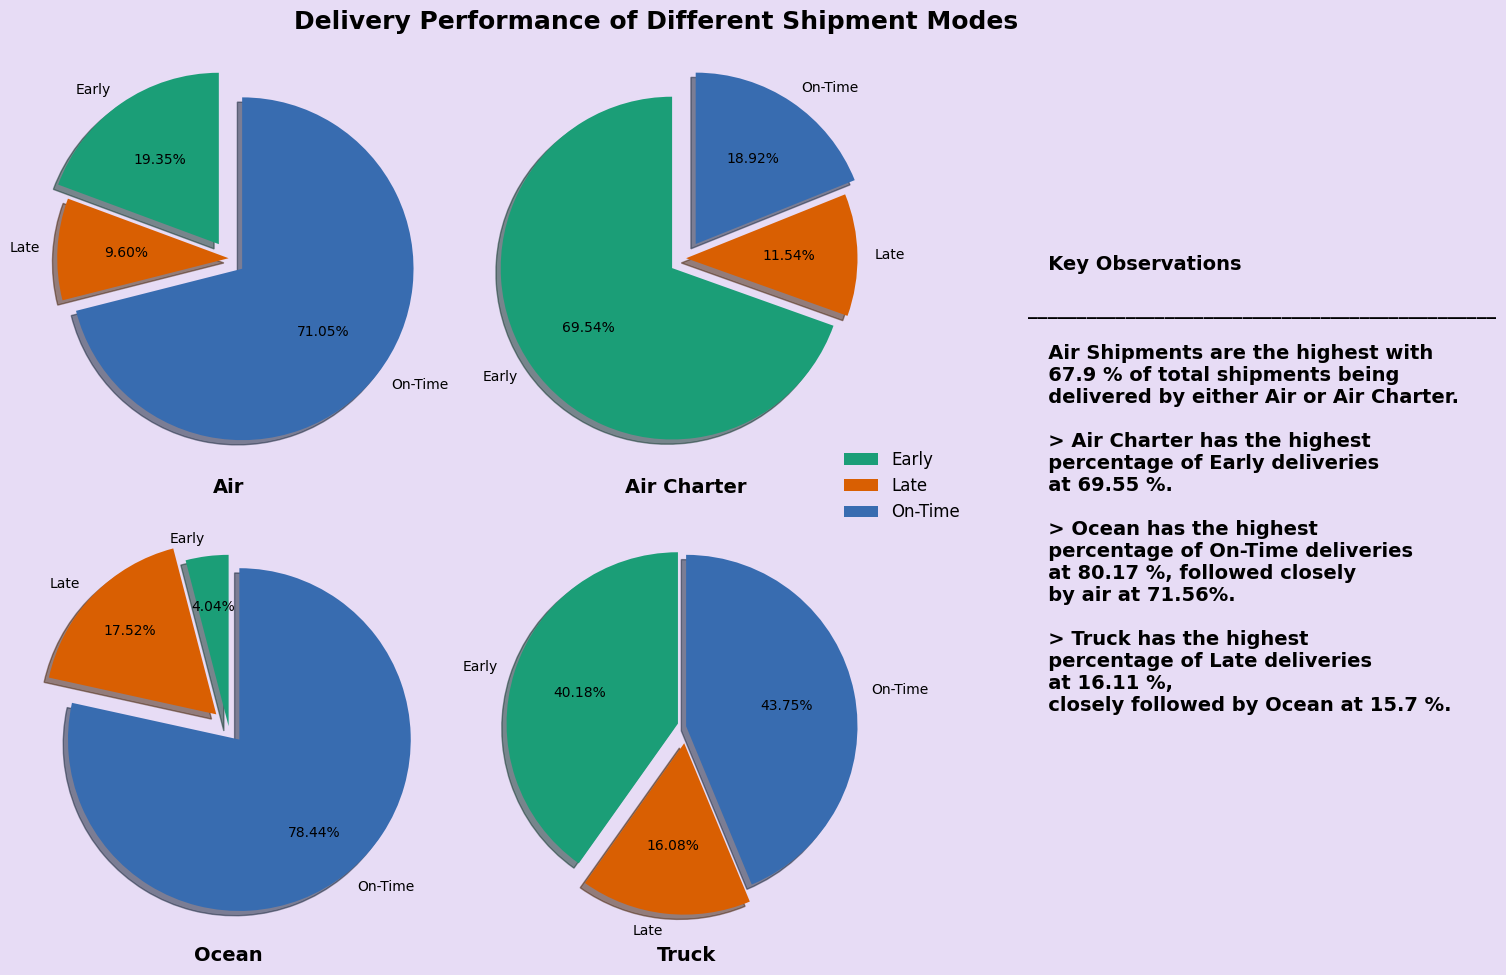

In [312]:
fig,ax = plt.subplots(2,2,figsize=(13.3,9.9),facecolor="#e7dcf5")

fig.subplots_adjust(right=0.72)

colors = ["#1b9e77", "#d95f02", "#386cb0"]

ax[0,0].pie(x=fx_shipment[fx_shipment['Shipment_Mode']=='Air']['Percentage'],labels=fx_shipment[fx_shipment['Shipment_Mode']=='Air']['Delivery_Status'],autopct="%1.2f%%",startangle=90,radius=1,shadow=True,colors=colors,explode=[0.1,0,0.1])
ax[0,0].set_xlabel('Air',fontdict={'fontsize':14,'fontweight':'heavy'})

ax[0,1].pie(x=fx_shipment[fx_shipment['Shipment_Mode']=='Air Charter']['Percentage'],labels=fx_shipment[fx_shipment['Shipment_Mode']=='Air Charter']['Delivery_Status'],autopct="%1.2f%%",startangle=90,radius=1,shadow=True,explode=[0.1,0,0.1],colors=colors)
ax[0,1].set_xlabel('Air Charter',fontdict={'fontsize':14,'fontweight':'heavy'})

ax[1,0].pie(x=fx_shipment[fx_shipment['Shipment_Mode']=='Ocean']['Percentage'],labels=fx_shipment[fx_shipment['Shipment_Mode']=='Ocean']['Delivery_Status'],autopct="%1.2f%%",startangle=90,radius=1,shadow=True,pctdistance=0.7,explode=[0,0.1,0.1],colors=colors)
ax[1,0].set_xlabel('Ocean',fontdict={'fontsize':14,'fontweight':'heavy'})

ax[1,1].pie(x=fx_shipment[fx_shipment['Shipment_Mode']=='Truck']['Percentage'],labels=fx_shipment[fx_shipment['Shipment_Mode']=='Truck']['Delivery_Status'],autopct="%1.2f%%",startangle=90,radius=1,shadow=True,explode=[0.05,0.1,0],colors=colors)
ax[1,1].set_xlabel('Truck',fontdict={'fontsize':14,'fontweight':'heavy'})

fig.patch.set_facecolor("#e7dcf5")

insight_text=("   Key Observations\n\n________________________________________________\n\n   Air Shipments are the highest with\n   67.9 % of total shipments being\n   delivered by either Air or Air Charter.\n\n   > Air Charter has the highest\n   percentage of Early deliveries\n   at 69.55 %.\n\n   > Ocean has the highest\n   percentage of On-Time deliveries\n   at 80.17 %, followed closely\n   by air at 71.56%.\n\n   > Truck has the highest\n   percentage of Late deliveries\n   at 16.11 %,\n   closely followed by Ocean at 15.7 %.")

txt_artist = fig.text(0.78, 0.5, insight_text, fontsize=14, fontweight='semibold', va='center', ha='left')

fig.legend(labels=['Early','Late','On-Time'],bbox_to_anchor=(0.74, 0.55), frameon=False, fontsize=12)

fig.suptitle('Delivery Performance of Different Shipment Modes',fontsize=18,fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.72, 1])
plt.savefig("13.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- **Air shipments** dominate overall deliveries, with **67.9%** of all shipments being delivered via **Air or Air Charter**.  
- **Air Charter** excels in **early deliveries**, recording **69.55%** of shipments delivered ahead of time.  
- **Ocean shipments** show the **highest on-time performance** at **80.17%**, followed closely by **Air (71.56%)**.  
- **Truck shipments** have the **highest late delivery rate** at **16.11%**, followed closely by **Ocean at 15.7%**.  

---

#### Business Takeaway  

- **Air and Air Charter** are the backbone of FedEx’s medical shipment strategy, balancing speed and reliability.  
- **Air Charter**, while costlier, provides **critical value for urgent shipments**, ensuring nearly 70% arrive early — crucial for **time-sensitive medical supplies**.  
- **Ocean shipping**, though slower, is highly dependable for **bulk shipments**, offering the **highest on-time rate**.  
- **Truck shipments** present a **reliability concern**, with the highest late deliveries. This indicates a need for **process optimization and better route management** in ground logistics.  

The analysis shows FedEx strategically leverages **Air for speed, Ocean for dependability, and Trucks for regional coverage** — but reliability gaps in **Truck deliveries** could increase risks for critical shipments unless addressed.

### Chart 10

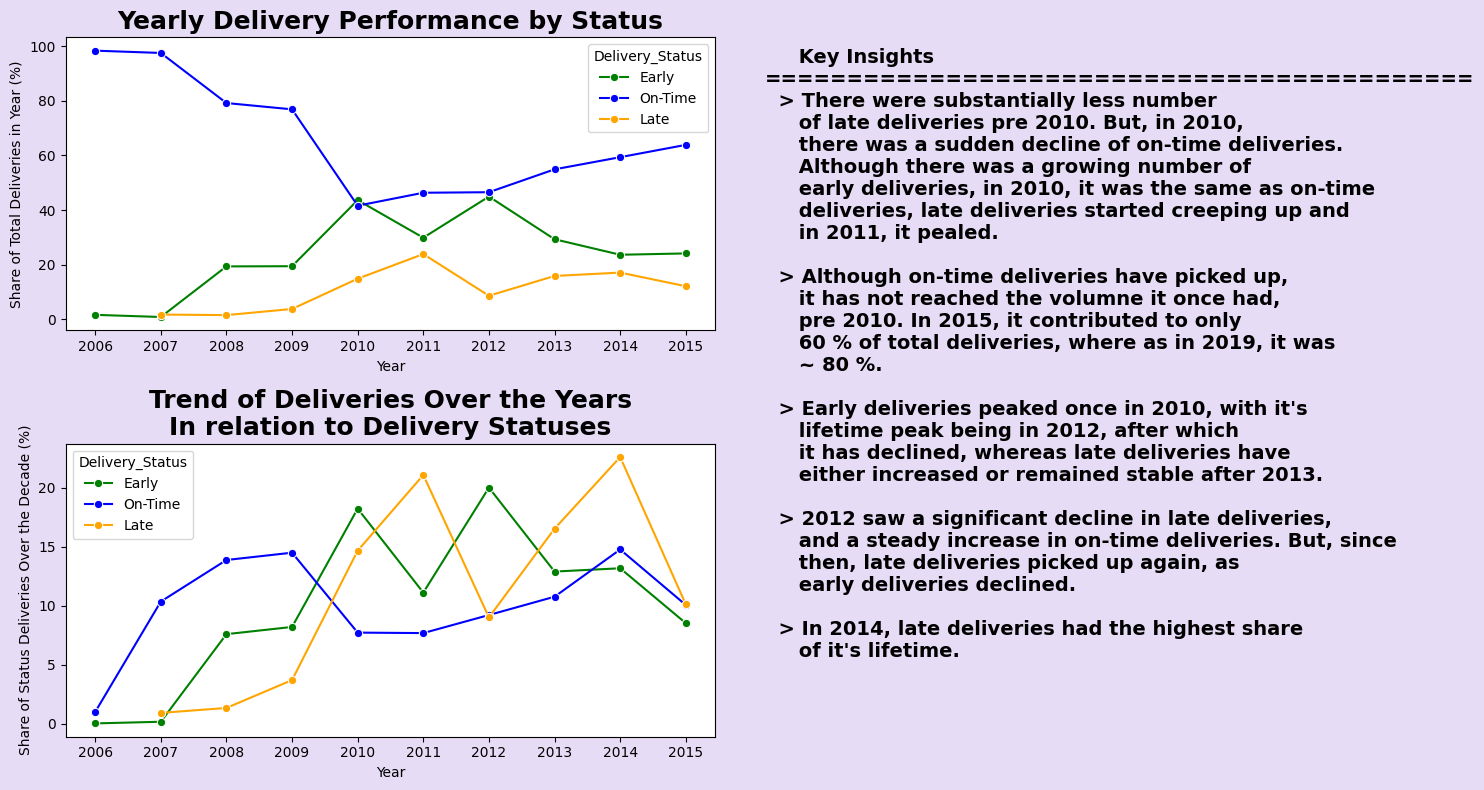

In [313]:
fig,ax=plt.subplots(2,2,figsize=(14,8))

sns.lineplot(data=fx_year,x='Year_of_Delivery',y='Pct_of_Year',hue='Delivery_Status',marker="o",palette={'Early':'green','On-Time':'blue','Late':'orange'},ax=ax[0,0])
ax[0,0].set_title('Yearly Delivery Performance by Status',fontdict={'fontsize':18,'fontweight':'heavy'})
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Share of Total Deliveries in Year (%)')

sns.lineplot(data=fx_year,x='Year_of_Delivery',y='Pct',hue='Delivery_Status',marker="o",palette={'Early':'green','On-Time':'blue','Late':'orange'},ax=ax[1,0])
ax[1,0].set_title('Trend of Deliveries Over the Years\nIn relation to Delivery Statuses',fontdict={'fontsize':18,'fontweight':'heavy'})
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Share of Status Deliveries Over the Decade (%)')

ax[0,0].xaxis.set_major_locator(mticker.MultipleLocator(1))
ax[1,0].xaxis.set_major_locator(mticker.MultipleLocator(1))

ax[0,1].axis("off")
ax[1,1].axis("off")

fig.patch.set_facecolor("#e7dcf5")

fig.text(0.55,0.55,"     Key Insights\n===========================================\n  > There were substantially less number\n     of late deliveries pre 2010. But, in 2010,\n     there was a sudden decline of on-time deliveries.\n     Although there was a growing number of\n     early deliveries, in 2010, it was the same as on-time\n     deliveries, late deliveries started creeping up and\n     in 2011, it pealed.\n\n  > Although on-time deliveries have picked up,\n     it has not reached the volumne it once had,\n     pre 2010. In 2015, it contributed to only\n     60 % of total deliveries, where as in 2019, it was\n     ~ 80 %.\n\n  > Early deliveries peaked once in 2010, with it's\n     lifetime peak being in 2012, after which\n     it has declined, whereas late deliveries have\n     either increased or remained stable after 2013.\n\n  > 2012 saw a significant decline in late deliveries,\n     and a steady increase in on-time deliveries. But, since\n     then, late deliveries picked up again, as\n     early deliveries declined.\n\n  > In 2014, late deliveries had the highest share\n     of it's lifetime.",va='center', ha='left',fontsize=14,fontweight='semibold')

plt.tight_layout()
plt.savefig("14.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- **Pre-2010:** Late deliveries were minimal, with on-time deliveries being the dominant category.  
- **2010 Shift:** A sudden decline in on-time deliveries coincided with a rise in both early and late deliveries. By 2010, early deliveries were almost equal to on-time deliveries.  
- **2011–2012:** Late deliveries peaked in 2011, while early deliveries reached their highest point in 2012.  
- **Post-2013:** On-time deliveries improved gradually but never regained their pre-2010 dominance. Late deliveries, though reduced from their peak, remained consistently higher than before.  
- **2014:** Late deliveries had their largest share of the entire period, overtaking early deliveries.  

---

#### Business Takeaway  

- The **drop in on-time deliveries after 2010** highlights a systemic disruption — possibly linked to operational, supply chain, or policy changes in logistics.  
- **Late deliveries becoming more frequent post-2010** suggests reliability issues that could undermine customer trust, especially for critical medical shipments.  
- **Early deliveries**, while beneficial, cannot compensate for the operational risk posed by late shipments in healthcare supply chains.  
- For FedEx, this signals the need to **invest in monitoring, route optimization, and contingency planning** to bring delivery performance closer to pre-2010 reliability.  
- In the medical context, ensuring **consistent on-time delivery** is crucial to prevent stockouts or delays in life-saving treatments.

### Chart 11

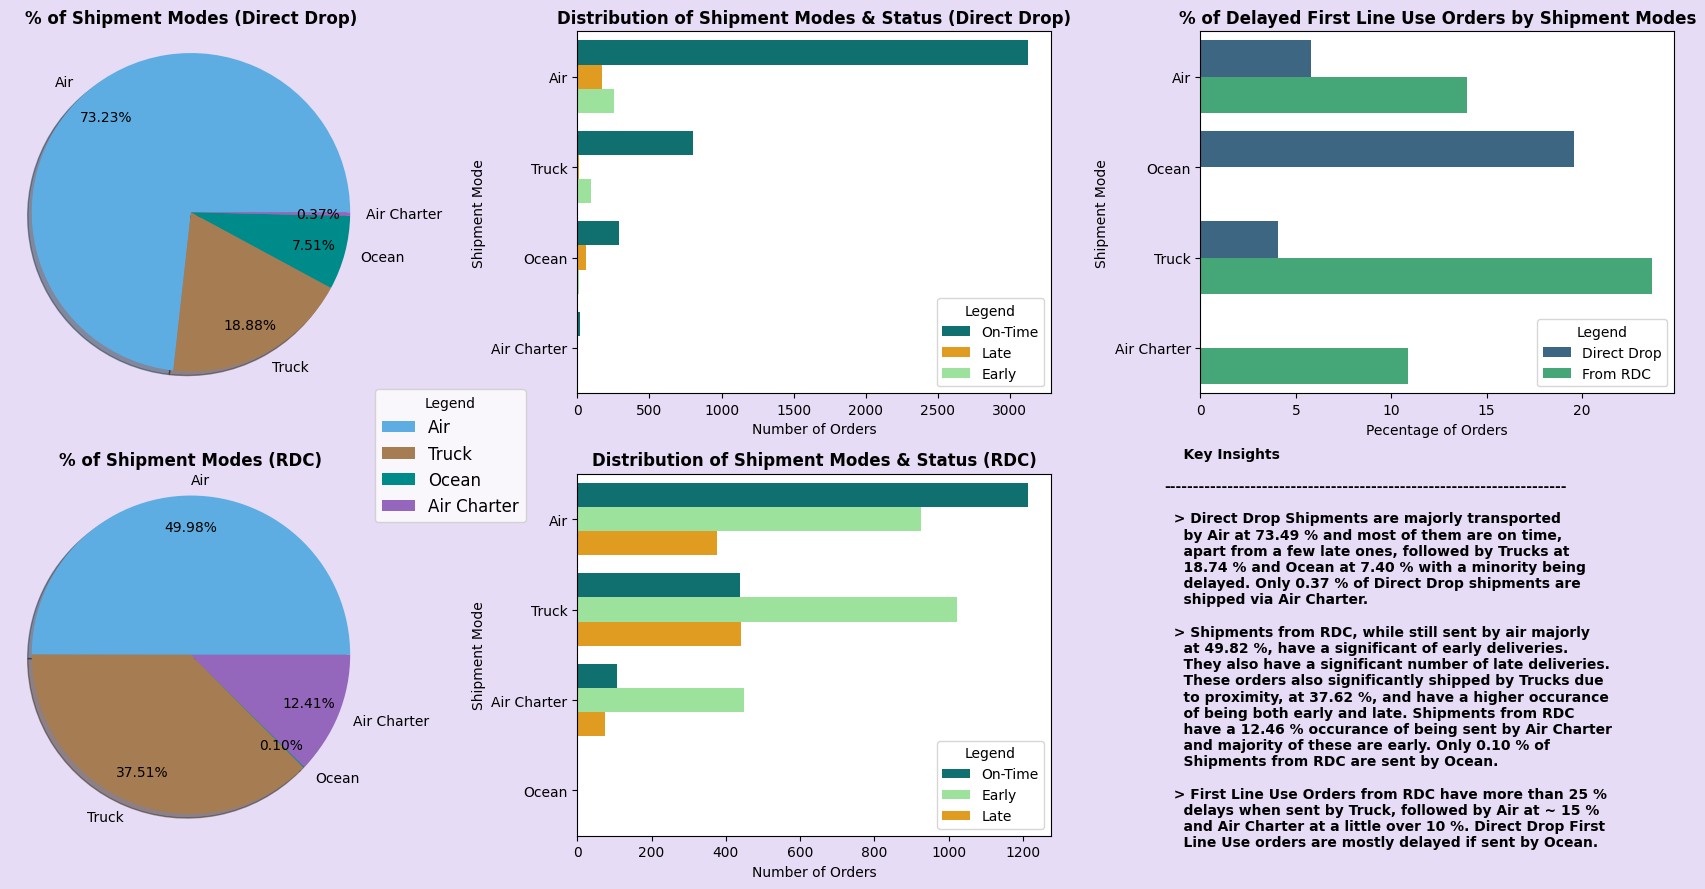

In [314]:
fig,ax=plt.subplots(2,3,figsize=(17.5,9))

color1 = ["#5DADE2", "#a67c52", "#008B8B", "#9467bd"]

ax[0,0].pie(x=fx_rdc1['Non_RDC'],labels=fx_rdc1['Shipment_Mode'],autopct="%1.2f%%",colors=color1,pctdistance=0.8,radius=1.1,shadow=True)
ax[0,0].set_title('% of Shipment Modes (Direct Drop)',fontdict={'fontweight':'semibold'})

ax[1,0].pie(x=fx_rdc1['RDC'],labels=fx_rdc1['Shipment_Mode'],autopct="%1.2f%%",colors=color1,pctdistance=0.8,radius=1.1,shadow=True)
ax[1,0].set_title('% of Shipment Modes (RDC)',fontdict={'fontweight':'semibold'})

sns.countplot(data=fx[fx['Fulfill_Via']=='From RDC'],y='Shipment_Mode',hue='Delivery_Status',ax=ax[1,1],palette={'Early':'lightgreen','Late':'orange','On-Time':'teal'})
ax[1,1].set_title('Distribution of Shipment Modes & Status (RDC)',fontdict={'fontweight':'semibold'})
ax[1,1].set_xlabel('Number of Orders')
ax[1,1].set_ylabel('Shipment Mode')
ax[1,1].legend(title='Legend',loc=4)

sns.countplot(data=fx[fx['Fulfill_Via']!='From RDC'],y='Shipment_Mode',hue='Delivery_Status',ax=ax[0,1],palette={'Early':'lightgreen','Late':'orange','On-Time':'teal'})
ax[0,1].set_title('Distribution of Shipment Modes & Status (Direct Drop)',fontdict={'fontweight':'semibold'})
ax[0,1].set_xlabel('Number of Orders')
ax[0,1].set_ylabel('Shipment Mode')
ax[0,1].legend(title='Legend',loc=4)

sns.barplot(data=fx_fl[(fx_fl['First_Line']=='Yes')&(fx_fl['Delivery_Status']=='Late')],y='Shipment_Mode',x='Pct',hue='Fulfill_Via',ax=ax[0,2],palette='viridis')
ax[0,2].set_title('% of Delayed First Line Use Orders by Shipment Modes',fontdict={'fontweight':'semibold'})
ax[0,2].set_xlabel('Pecentage of Orders')
ax[0,2].set_ylabel('Shipment Mode')
ax[0,2].legend(title='Legend',loc=4)

ax[1,2].axis('off')

fig.patch.set_facecolor("#e7dcf5")

fig.legend(title='Legend',labels=['Air','Truck','Ocean','Air Charter'],bbox_to_anchor=(0.34, 0.57), frameon=True, fontsize=12)

fig.text(0.7,0.035,"    Key Insights\n\n----------------------------------------------------------------------\n\n  > Direct Drop Shipments are majorly transported\n    by Air at 73.49 % and most of them are on time,\n    apart from a few late ones, followed by Trucks at\n    18.74 % and Ocean at 7.40 % with a minority being\n    delayed. Only 0.37 % of Direct Drop shipments are\n    shipped via Air Charter.\n\n  > Shipments from RDC, while still sent by air majorly\n    at 49.82 %, have a significant of early deliveries.\n    They also have a significant number of late deliveries.\n    These orders also significantly shipped by Trucks due\n    to proximity, at 37.62 %, and have a higher occurance\n    of being both early and late. Shipments from RDC\n    have a 12.46 % occurance of being sent by Air Charter\n    and majority of these are early. Only 0.10 % of\n    Shipments from RDC are sent by Ocean.\n\n  > First Line Use Orders from RDC have more than 25 %\n    delays when sent by Truck, followed by Air at ~ 15 %\n    and Air Charter at a little over 10 %. Direct Drop First\n    Line Use orders are mostly delayed if sent by Ocean.\n",fontweight='semibold')

plt.tight_layout()
plt.savefig("15.png", dpi=300, bbox_inches="tight")
plt.show()

#### Interpretation  

- **Direct Drop Shipments**  
  - Majority (73.5%) of shipments are via **Air**, with most being delivered on time.  
  - **Truck (18.7%)** and **Ocean (7.4%)** also contribute, but they show higher proportions of late deliveries compared to Air.  
  - Air Charter is negligible at only 0.37%.  

- **RDC Shipments**  
  - While **Air** still dominates (49.8%), the share of **Truck (37.6%)** and **Air Charter (12.5%)** increases significantly.  
  - RDC shipments have a much larger share of **early and late deliveries**, showing less reliability compared to Direct Drop.  

- **First Line Use Orders (Critical Shipments)**  
  - Delay risk is highest when shipped via **Truck (~25%)**, followed by **Air (~15%)**, and **Air Charter (~10%)**.  
  - Ocean shipments for critical orders almost always result in delays, making them unsuitable for time-sensitive medical deliveries.  

---

#### Business Takeaway  

- **Direct Drop + Air** remains the most **reliable combination** for ensuring timely deliveries, especially for medical shipments.  
- **RDC Shipments introduce variability** — while Air remains strong, reliance on Truck and Air Charter increases risks of delays and inconsistencies.  
- For **critical First Line Use Orders**, FedEx should **minimize reliance on Truck and Ocean**, as they exhibit the **highest delay percentages**.  
- By **prioritizing Direct Drop Air shipments** and limiting RDC-based Truck/Ocean routing, FedEx can significantly reduce delay rates and ensure better compliance with medical shipment standards.  

## Map Plot

In [315]:
fig = px.choropleth(
    fx_late_countries,
    locations="iso_alpha3",
    color="Pct",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Percentage of Late Deliveries by Country",
    projection="natural earth"
)

fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.write_image("map.png", scale=2)

fig.write_html("map.html")

fig.show()

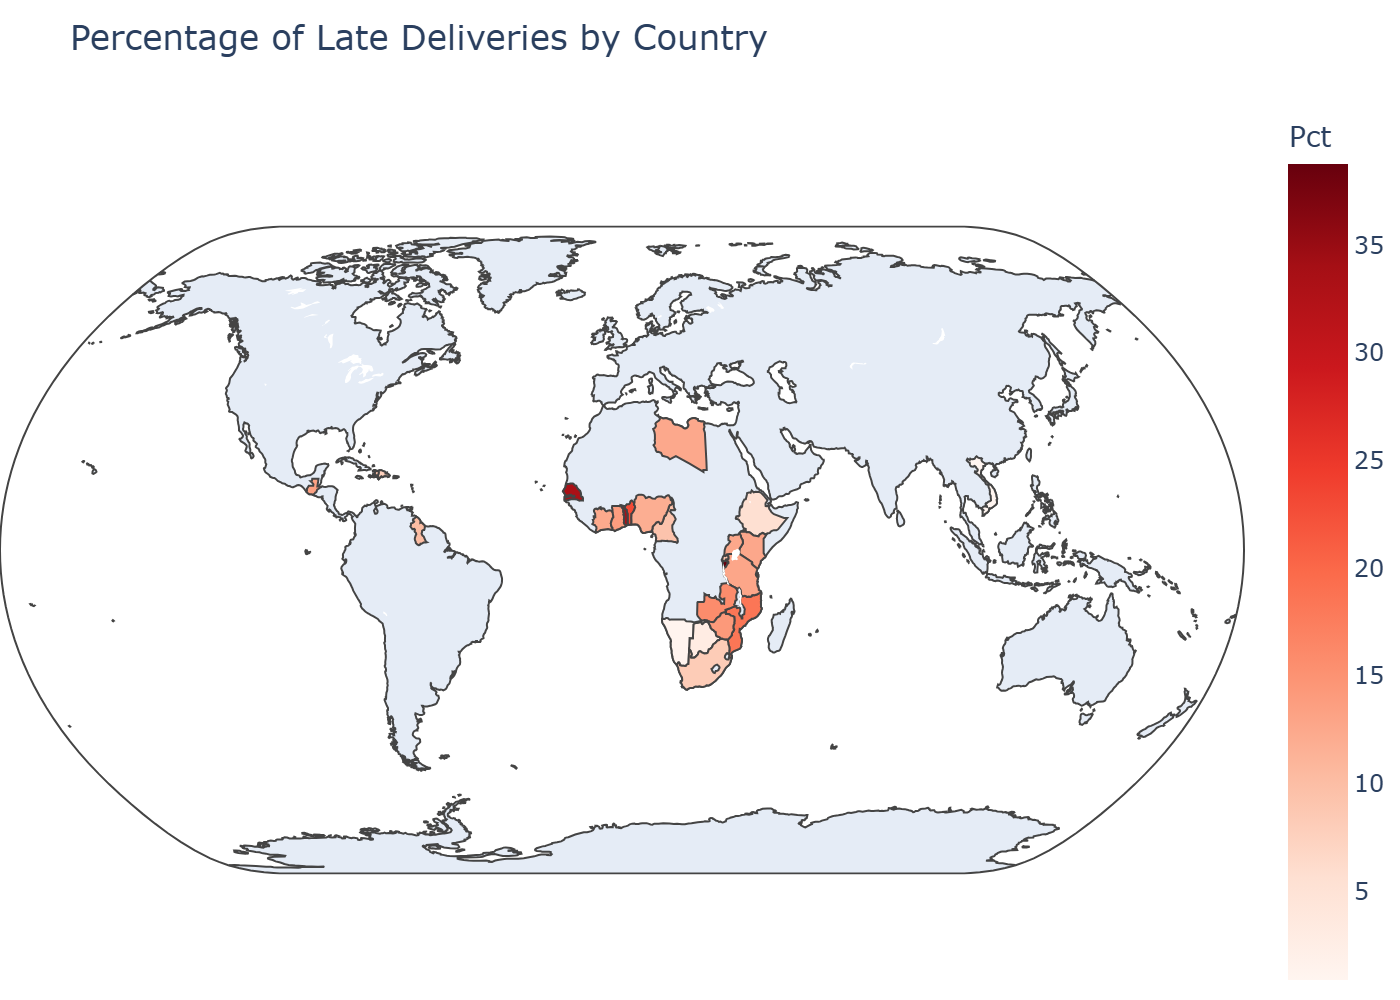

In [316]:
from IPython.display import Image
Image("map.png")

### Percentage of Late Deliveries by Country 🌍

**Interpretation:**
- The intensity of red shading indicates a higher share of late deliveries.
- Most countries with significant late delivery percentages are concentrated in **Africa**, with a few pockets in **South America** and **Asia**.
- The darkest concentration (30–40% late deliveries) appears in select West and Central African nations, while other regions remain largely unaffected.

**Business Takeaways:**
- **Regional Bottlenecks:** Countries with consistently higher late delivery rates point to structural challenges — weak logistics infrastructure, customs delays, or carrier inefficiencies.
- **Risk Segmentation:** African and select South American markets may require **special handling strategies** — e.g., stronger partnerships with reliable carriers or buffer timelines.
- **Opportunity for Process Optimization:** Focusing operational improvements in these high-delay regions can directly improve **service reliability** and **customer satisfaction**, while reducing penalty costs.
- **Strategic Planning:** These hotspots should be prioritized when planning **distribution hubs, RDCs, or localized logistics partnerships** to cut down on delays.

## Heatmap

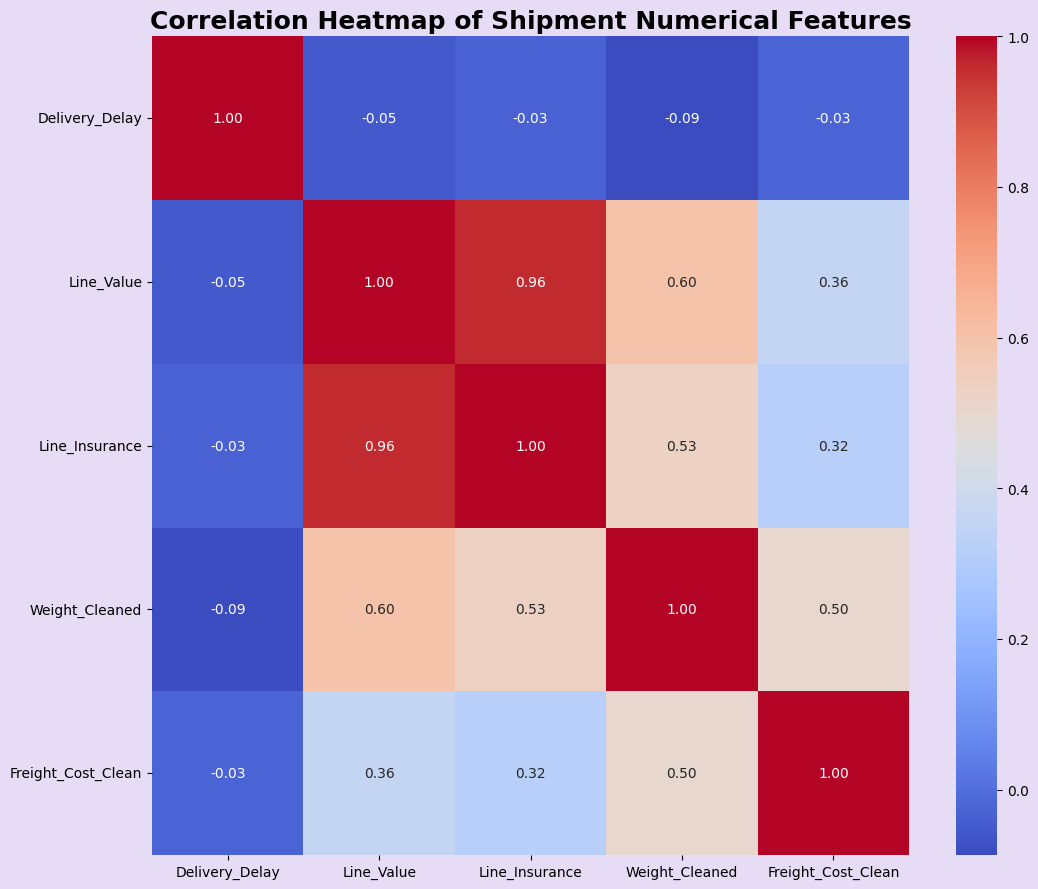

In [317]:
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
ax.set_title("Correlation Heatmap of Shipment Numerical Features", fontsize=18, fontweight="bold")
fig.patch.set_facecolor("#e7dcf5")
plt.tight_layout()
plt.yticks(rotation=0)
plt.savefig("16.png", dpi=300, bbox_inches="tight")
plt.show()

### Interpretation

- Delivery_Delay has almost no correlation with Line Value, Line Insurance, Weight, or Freight Cost (all ~0 to -0.1).
    - 👉 This means delays are operational/logistical, not driven by monetary or weight factors.

- Line_Value vs Line_Insurance has a very strong positive correlation (0.96), which is expected since insurance is usually calculated based on value.

- Weight_Cleaned shows moderate correlation with Line Value (0.60) and Line Insurance (0.53).
    - 👉 Heavier shipments tend to have higher declared values and insurance.

- Freight_Cost_Clean has a moderate correlation with both Weight (0.50) and Line Value (0.36).
👉 Cost is influenced by both weight and declared value, but not perfectly proportional.

### Business Takeaway

- Delays are not tied to cost, value, or weight → FedEx cannot solve delivery reliability by adjusting pricing or weight categories. Focus should instead be on route efficiency, logistics management, and RDC handling.

- Insurance and declared value are tightly bound → streamlining this calculation could reduce manual work.

- Freight costs scale with weight and value, but only moderately, suggesting pricing models may include fixed overheads beyond shipment specs. FedEx could refine its pricing to better capture real shipment effort.

# Summary

## **Project Summary**

This analysis of FedEx’s global logistics dataset revealed critical patterns:

- **Delivery Performance**  
  - **Air** is the most reliable mode (9% delays), while **Trucks** face the highest risk (16%).  
  - **Ocean** is cost-efficient for bulk loads but prone to 15%+ delays.  
  - **Air Charter** is expensive yet vital for urgent shipments, often delivering early.  

- **Fulfillment Methods**  
  - **Direct Drop** shows strong consistency and should be prioritized for time-sensitive shipments.  
  - **Regional Distribution Centers (RDCs)** introduce variability, with both more early and more late deliveries.  

- **Freight Cost vs. Weight**  
  - Strong positive correlation, but cost does not guarantee on-time delivery.  
  - Heavy shipments (>2000 kg) increase unpredictability.  

- **INCO Terms**  
  - **EXW** is the most reliable and widely used, while RDC contracts require optimization.  

- **Country Analysis**  
  - Delivery delays are concentrated in select African nations, with variability across geographies.  

## **Business Recommendations**

- **Prioritize Air** for critical and medical shipments despite higher costs.  
- **Optimize RDC operations** to reduce variability in delivery performance.  
- **Monitor outlier shipments** (very high weight/cost) separately for risk management.  
- **Balance logistics mix**: Air for urgency, Ocean for bulk, Truck for regional, Air Charter for emergencies.  

---

This project demonstrates how structured EDA transforms raw shipment data into strategic insights for logistics optimization. It highlights my growing skills in **data cleaning, visualization, and business storytelling** — building the foundation for more advanced Data Science and Machine Learning work ahead.
